# Online News Popularity Project
### A Prediction Study
#### By: Mayra Weidner

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.ensemble import RandomForestRegressor
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Load dataset
df = pd.read_csv('Data/df_cleaned.csv')

## Models

My project involves utilizing regression analysis to predict the number of times articles can be shared. Below I will describe the 3 different regression models that I could use and analyze any foreseen difficulties.

**Linear Regression:**    
Linear regression is a common and simple regression model used to establish a linear relationship between the predictor / independent variables (all attributes besides number of shares) and the dependent variable (number of shares). R-squared is important because it measures how well the model fits the data. R-squared closer to 1 indicates a better fit. R-squared near 0 means that the model is wrong, or the error variance is too big or both.

I may choose linear regression because it is easy to interpret and implement. It can provide insights into the direction and magnitude of the relationships between the predictor variables and the number of shares.

The boxplots of the attributes shows that there is some noise in the data so a linear regression model might be a good fit since it may be difficult to detect another shape for the model.

As previously discussed in the Data Cleaning and EDA sections of this project, I dropped n_non_stop_words, n_unique_tokens, kw_avg_min, and kw_avg_avg because these attributes were strongly correlated with other attributes. Excluding strongly correlated attributes is unlikely to significantly impact the model's performance, and it can even be beneficial by preventing overfitting and simplifying the model. 

**Multilinear Regression:**  
Multilinear regression extends linear regression by including more than one predictor variable. This allows for capturing the combined effect of multiple predictors on the dependent variable. 

I may use multilinear regression if there are multiple relevant attributes that can potentially impact the number of shares. For example, data channel and weekday. By incorporating multiple predictors, the model can provide a more comprehensive understanding of the factors influencing shareability.

The ideal scenario for this model is when predictors are uncorrelated. Since I already removed some of the strongly correlated attributes, it may reduce the difficulty of interpreting regression coefficients so additional data cleaning and checks for collinearity (when two or more variables are exactly correlated) may not be necessary. R-squared is also important with this model because it measures how well the model fits the data

**Logistic Regression:**  
Logistic regression is a classification method commonly used when the dependent variable is categorical or binary. Using logistic regression, I could predict the likelihood of an article being highly shared or not (e.g., above a certain threshold) rather than predicting the exact number of shares. Logistic regression can be used to model the probability of an article falling into a specific category of high or low shares based on the given predictors. In this case I could use the median shares as the threshold. Articles under the median shares would be low shares (unpopular - 0) and articles with shares greater than or equal to the median shares would be high shares (popular - 1). This approach would require me to change the purpose of my project.

**Conclusion: Model Selection**  
Given my analysis of the 3 regression models that I could use, I decided to start with linear regression as this is the easiest to implement and interpret. Since I have already removed strongly correlated attributes, I will also try multilinear regression and determine which model is the better fit. 

I will not use logistic regression as this model would require me to change the purpose of my project and it's too late into the process to do this.

### Simple Linear Regression

In [3]:
df.head()

,n_tokens_title,n_tokens_content,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,kw_min_min,...,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,data_channel,weekday_is
0,12.0,219.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,...,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,2,1
1,9.0,255.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,...,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,3,1
2,9.0,211.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,...,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,3,1
3,9.0,531.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,...,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,2,1
4,13.0,1072.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,...,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,5,1


In [4]:
df.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'kw_min_min', 'kw_max_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03',
       'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'shares', 'data_channel', 'weekday_is'],
      dtype='object')

In [5]:
# Predictors in the dataset
predictors = ['n_tokens_title', 'n_tokens_content', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'kw_min_min', 'kw_max_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03',
       'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'data_channel', 'weekday_is']

In [6]:
# Extract features (X) and target (y)
X = df[predictors]
y = df['shares']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [7]:
# Shape of train and test datasets
print(X_train.shape)
print(X_test.shape)

(25756, 42)
(12687, 42)


In [8]:
# Print shape of y objects
print(y_train.shape)
print(y_test.shape)

(25756,)
(12687,)


In [9]:
# Create DataFrame with training dataset
x_df_train = pd.DataFrame(data=X_train, columns=predictors)
x_df_train.head()

,n_tokens_title,n_tokens_content,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,kw_min_min,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,data_channel,weekday_is
35308,12.0,294.0,0.820359,7.0,5.0,2.0,1.0,4.625850,7.0,-1.0,...,1.0,-0.332143,-0.400000,-0.1250,0.00000,0.000000,0.50000,0.000000,2,3
2595,11.0,284.0,0.762500,1.0,0.0,1.0,1.0,4.690141,5.0,217.0,...,0.8,-0.194444,-0.300000,-0.1000,0.60000,0.200000,0.10000,0.200000,3,4
6100,10.0,254.0,0.745455,7.0,5.0,1.0,0.0,4.748031,6.0,4.0,...,0.7,-0.133333,-0.166667,-0.1000,0.00000,0.000000,0.50000,0.000000,3,2
11827,9.0,292.0,0.750000,6.0,5.0,0.0,17.0,4.602740,5.0,4.0,...,1.0,-0.475000,-0.700000,-0.2000,0.49513,0.211039,0.00487,0.211039,4,4
12758,11.0,306.0,0.741573,15.0,2.0,15.0,0.0,4.205882,10.0,4.0,...,1.0,-0.473438,-1.000000,-0.1875,0.00000,0.000000,0.50000,0.000000,7,3


In [10]:
# Training series with shares
y_df_train = pd.DataFrame(data=y_train, columns=['shares']) 
y_df_train.head()

,shares
35308,1400
2595,2300
6100,968
11827,1500
12758,74100


In [11]:
# Concatenate x and y together to create dataframe of training set
train_df = pd.concat([x_df_train, y_df_train], axis=1, sort=False)
train_df.head()

,n_tokens_title,n_tokens_content,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,kw_min_min,...,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,data_channel,weekday_is,shares
35308,12.0,294.0,0.820359,7.0,5.0,2.0,1.0,4.625850,7.0,-1.0,...,-0.332143,-0.400000,-0.1250,0.00000,0.000000,0.50000,0.000000,2,3,1400
2595,11.0,284.0,0.762500,1.0,0.0,1.0,1.0,4.690141,5.0,217.0,...,-0.194444,-0.300000,-0.1000,0.60000,0.200000,0.10000,0.200000,3,4,2300
6100,10.0,254.0,0.745455,7.0,5.0,1.0,0.0,4.748031,6.0,4.0,...,-0.133333,-0.166667,-0.1000,0.00000,0.000000,0.50000,0.000000,3,2,968
11827,9.0,292.0,0.750000,6.0,5.0,0.0,17.0,4.602740,5.0,4.0,...,-0.475000,-0.700000,-0.2000,0.49513,0.211039,0.00487,0.211039,4,4,1500
12758,11.0,306.0,0.741573,15.0,2.0,15.0,0.0,4.205882,10.0,4.0,...,-0.473438,-1.000000,-0.1875,0.00000,0.000000,0.50000,0.000000,7,3,74100


In [12]:
# Create DataFrame with test dataset
x_df_test = pd.DataFrame(data=X_test, columns=predictors)
x_df_test.head()

,n_tokens_title,n_tokens_content,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,kw_min_min,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,data_channel,weekday_is
5532,9.0,218.0,0.843750,2.0,1.0,0.0,1.0,4.353211,7.0,4.0,...,0.6,-0.409524,-0.666667,-0.071429,0.0,0.0000,0.5,0.0000,2,4
15242,11.0,268.0,0.835616,5.0,3.0,1.0,0.0,4.492537,4.0,4.0,...,0.6,-0.118750,-0.187500,-0.050000,0.1,0.3000,0.4,0.3000,6,3
35329,14.0,851.0,0.633858,15.0,6.0,1.0,0.0,4.584019,7.0,-1.0,...,0.8,-0.307568,-0.800000,-0.050000,0.7,0.1125,0.2,0.1125,5,3
9288,9.0,725.0,0.536748,19.0,6.0,1.0,0.0,4.590345,10.0,4.0,...,1.0,-0.246875,-0.500000,-0.100000,0.9,-0.6000,0.4,0.6000,6,3
14634,8.0,616.0,0.753846,10.0,0.0,1.0,0.0,4.683442,7.0,4.0,...,1.0,-0.337976,-0.625000,-0.071429,0.0,0.0000,0.5,0.0000,2,5


In [13]:
# Test series with shares
y_df_test = pd.DataFrame(data=y_test, columns=['shares']) 
y_df_test.head()

,shares
5532,1500
15242,1100
35329,1600
9288,9500
14634,682


In [14]:
# Concatenate x and y together to create dataframe of test set
test_df = pd.concat([x_df_test, y_df_test], axis=1, sort=False)
test_df.head()

,n_tokens_title,n_tokens_content,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,kw_min_min,...,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,data_channel,weekday_is,shares
5532,9.0,218.0,0.843750,2.0,1.0,0.0,1.0,4.353211,7.0,4.0,...,-0.409524,-0.666667,-0.071429,0.0,0.0000,0.5,0.0000,2,4,1500
15242,11.0,268.0,0.835616,5.0,3.0,1.0,0.0,4.492537,4.0,4.0,...,-0.118750,-0.187500,-0.050000,0.1,0.3000,0.4,0.3000,6,3,1100
35329,14.0,851.0,0.633858,15.0,6.0,1.0,0.0,4.584019,7.0,-1.0,...,-0.307568,-0.800000,-0.050000,0.7,0.1125,0.2,0.1125,5,3,1600
9288,9.0,725.0,0.536748,19.0,6.0,1.0,0.0,4.590345,10.0,4.0,...,-0.246875,-0.500000,-0.100000,0.9,-0.6000,0.4,0.6000,6,3,9500
14634,8.0,616.0,0.753846,10.0,0.0,1.0,0.0,4.683442,7.0,4.0,...,-0.337976,-0.625000,-0.071429,0.0,0.0000,0.5,0.0000,2,5,682


In [15]:
# Use Statsmodel to create simple linear regression model of shares based on a single predictor 
# train model on the training set 

# Loop through predictors and fit linear models
for i in predictors:
    lin_model = smf.ols(formula=f'shares ~ {i}', data=train_df).fit()
    print(f"Dependent variable: {i}")
    print(f"R-squared: {lin_model.rsquared}")
    print(f"Coefficient 0 (Intercept): {lin_model.params[0]}")
    print(f"Coefficient 1 ({i}): {lin_model.params[1]}")
    print()

Dependent variable: n_tokens_title
R-squared: 0.00015152374394800106
Coefficient 0 (Intercept): 2763.7066860374416
Coefficient 1 (n_tokens_title): 41.38297036207493

Dependent variable: n_tokens_content
R-squared: 1.6160891647132303e-07
Coefficient 0 (Intercept): 3189.821019878602
Coefficient 1 (n_tokens_content): 0.006101657911187552

Dependent variable: n_non_stop_unique_tokens
R-squared: 4.628901279946085e-06
Coefficient 0 (Intercept): 3190.5627214990263
Coefficient 1 (n_non_stop_unique_tokens): 3.7546717872647184

Dependent variable: num_hrefs
R-squared: 0.006000091722718537
Coefficient 0 (Intercept): 2651.9294168788438
Coefficient 1 (num_hrefs): 48.15881586146364

Dependent variable: num_self_hrefs
R-squared: 8.405814718170923e-06
Coefficient 0 (Intercept): 3175.4156501004113
Coefficient 1 (num_self_hrefs): 5.250899905331085

Dependent variable: num_imgs
R-squared: 0.004309108074243118
Coefficient 0 (Intercept): 2937.689088308962
Coefficient 1 (num_imgs): 56.20863511898652

Depend

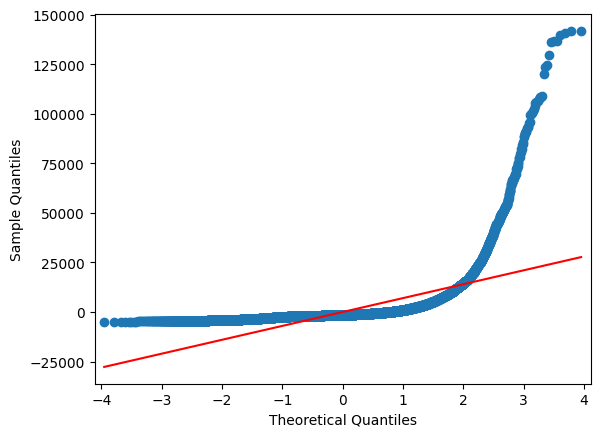

In [16]:
LDA_03_model = smf.ols(formula=f'shares~ LDA_03', data=train_df).fit()
sm.qqplot(LDA_03_model.resid, line='s');

#### Summary of Results & Analysis: Simple Linear Regression

R-squared is important because it measures how well the regression model fits the data. A higher R-squared value, closer to 1, signifies that a larger proportion of the variance in the dependent variable is explained by the independent variables, indicating a better fit. Conversely, an R-squared value closer to 0 indicates that the model's explanatory power is limited, or that the variance in the dependent variable is largely unaccounted for. 

In this case, the highest R-squared is 0.014 for the model with the LDA_03 predictor. Most of the models produced R-squared values of 0.000 suggesting that these models do not adequately capture variability in the target variable 'shares' based solely on the individual predictor variables. This limited explanatory power may arise due to the presence of multicollinearity or the assumption of a linear relationship not holding true.

**Evaluating Regression: Diagnostic Plot:**   
The model predicting shares based on LDA_03 had the highest R-squared value of 0.014. This value is nowhere near 1. Another check that I can do is for residuals which should be normally distributed. If the residuals are not normally distributed, it’s likely that errors can be introduced into the model that would not be made clear by R-squared. Below, I checked the residuals against the theoretical quantiles of the normal distribution for the model with LDA_03 as the predictor. The line is not linear and diagonal as expected if the residuals were normally distributed so this model may not be a good fit.

**Next steps:**    
Since I've explored simple linear regression, the next step is to try multilinear regression. This allows me to consider the relationships between multiple predictors and the target variable simultaneously. It might be that there are combined effects of predictors that a simple linear regression can't capture. Linear regression creates a line, whereas multilinear regression creates a hyperplane. This broader scope allows us to comprehend complex interactions that may not be adequately captured by a linear model. 

A critical consideration in multilinear regression is the presence of correlated predictors. Correlation among predictors can lead to multicollinearity, which may hinder the accurate interpretation of individual predictor impacts. To mitigate this, I have already taken steps during EDA to remove strongly correlated predictors. This preprocessing aims to enhance the stability and interpretability of the forthcoming multilinear regression model.

In the subsequent analysis, I will construct and evaluate a multilinear regression model, considering both the individual and combined contributions of predictors to the target variable.

### Multilinear Regression

In [17]:
# Turn list of predictors into string with plus signs that can be entered as model formula
def list_to_string(predictor_array):
    listToStr = '+'.join(map(str, predictor_array))
    print(listToStr)
    return listToStr

In [18]:
# Create a multilinear model that includes all predictors 
# Find coefficients that reduce the sum of least squares 
ml_model = smf.ols(formula='shares ~ {}'.format(list_to_string(predictors)), data=train_df).fit()
print(ml_model.summary())

n_tokens_title+n_tokens_content+n_non_stop_unique_tokens+num_hrefs+num_self_hrefs+num_imgs+num_videos+average_token_length+num_keywords+kw_min_min+kw_max_min+kw_min_max+kw_max_max+kw_avg_max+kw_min_avg+kw_max_avg+self_reference_min_shares+self_reference_max_shares+self_reference_avg_sharess+LDA_00+LDA_01+LDA_02+LDA_03+LDA_04+global_subjectivity+global_sentiment_polarity+global_rate_positive_words+global_rate_negative_words+rate_positive_words+rate_negative_words+avg_positive_polarity+min_positive_polarity+max_positive_polarity+avg_negative_polarity+min_negative_polarity+max_negative_polarity+title_subjectivity+title_sentiment_polarity+abs_title_subjectivity+abs_title_sentiment_polarity+data_channel+weekday_is
                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-st

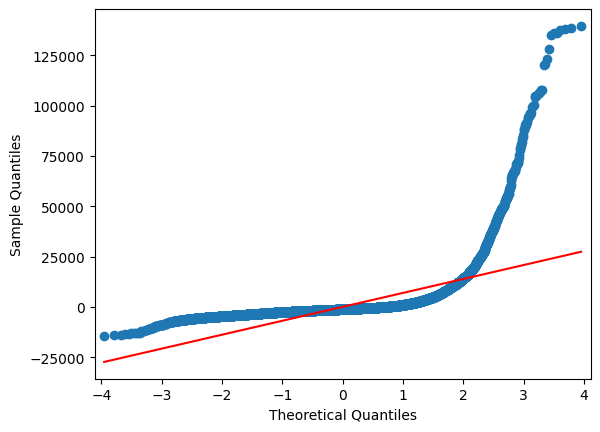

In [19]:
# Create a QQ plot for the residuals
sm.qqplot(ml_model.resid, line='s');

#### Summary of Results & Analysis: Multilinear Regression with all Predictors

The R-squared value of 0.038 produced by the multilinear model, which incorporates all predictors, represents a notable improvement compared to the R-squared values achieved through simple linear regression with single predictors. This value indicates that approximately 3.8% of the variability in the shares variable can be attributed to the collective influence of the predictor variables.

**Evaluating Regression: Diagnostic Plot:**  
I also checked the residuals against the theoretical quantiles of the normal distribution for the model with all predictors. The line is not linear and diagonal as expected if the residuals were normally distributed, so this model may not be a good fit. This suggests that further investigation and potentially model refinement might be necessary to address any violations of the normality assumption.

**Next steps:**  
To hopefully improve the model's predictive performance, I will explore Ridge and Lasso regression. These techniques are particularly suited for situations where multicollinearity is suspected, as they introduce regularization terms to the regression equation. Regularization methods like Ridge and Lasso help prevent overfitting and improve model stability by adding penalty terms to the model coefficients with different approaches. Ridge regression shrinks the coefficients towards zero, while Lasso regression encourages some of them to be exactly zero.

Upon careful analysis of the coefficient summary, a range of p-values associated with the predictors is observed. Lower p-values indicate a higher level of statistical significance, suggesting a stronger relationship between the predictor and the target variable, shares. Conversely, higher p-values imply that a predictor might have a limited impact on predicting shares.

Based on this assessment, I have identified the following predictors as statistically significant (p-value < 0.05): 
* n_tokens_title
* n_non_stop_unique_tokens
* num_hrefs
* num_self_hrefs
* num_imgs
* average_token_length
* num_keywords
* kw_max_min
* kw_min_max
* kw_avg_max
* kw_min_avg
* kw_max_avg
* self_reference_min_shares
* self_reference_max_shares
* LDA_00
* LDA_01
* LDA_02
* LDA_03
* LDA_04
* global_subjectivity
* title_sentiment_polarity
* abs_title_subjectivity
* data_channel

With this understanding of predictor significance, I will also refine the multilinear regression model by focusing on these statistically significant predictors. I'll aim to create a more accurate model that captures the underlying dynamics of article shares.

#### Enhancing Predictive Accuracy Through Regularization: Exploring Ridge and Lasso Regression

In [20]:
# Instantiate Ridge and Lasso regression models
# Alpha is a tuning parameter that determines strength of the regularization applied to the model
ridge_model = Ridge(alpha=1.0) 
lasso_model = Lasso(alpha=1.0)

# Fit the models to the training data
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

# Evaluate the models on the test data
ridge_r2 = ridge_model.score(X_test, y_test)
lasso_r2 = lasso_model.score(X_test, y_test)

print(f"R-squared for Ridge regression: {ridge_r2:.4f}")
print(f"R-squared for Lasso regression: {lasso_r2:.4f}")

R-squared for Ridge regression: 0.0281
R-squared for Lasso regression: 0.0284


Implementing Ridge and Lasso regression and evaluating their performance on the test data yields lower R-squared values that multilinear regression with all predictors.

**Next steps:**  
I'll attempt to enhance the performance of the Ridge and Lasso regression models by tuning the alpha parameter. The alpha parameter plays a crucial role in controlling the degree of regularization in these models. Too high an alpha value can lead to excessive regularization, underfitting the data, while too low an alpha value may result in inadequate regularization, leading to overfitting.

To identify the optimal alpha values for Ridge and Lasso, I will create models using a range of alpha values. The RidgeCV and LassoCV functions perform cross-validation to find the best alpha value. I will fit these models to the training data and extract the best alpha values determined by the cross-validation process.

#### Ridge and Lasso regression models using cross-validation for alpha selection

In [21]:
# Create Ridge and Lasso models with a range of alpha values
ridge_model = RidgeCV(alphas=[0.01, 0.1, 1.0, 5.0, 10.0, 20.0, 50.0])
lasso_model = LassoCV(alphas=[0.01, 0.1, 1.0, 5.0, 10.0, 20.0, 50.0], max_iter=10000)

# Fit the models to the training data
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

# Get the best alpha values from the models determined from cross-validation process
best_ridge_alpha = ridge_model.alpha_
best_lasso_alpha = lasso_model.alpha_

print(f"Best alpha for Ridge: {best_ridge_alpha:.4f}")
print(f"Best alpha for Lasso: {best_lasso_alpha:.4f}")

Best alpha for Ridge: 50.0000
Best alpha for Lasso: 10.0000


Now that I have the best alpha values, I will update the Ridge and Lasso models with this value and assess its performance on the test data. This iterative approach will allow me to strike the right balance between regularization and model fit, ultimately leading to a more accurate predictive model.

In [22]:
# Instantiate Ridge and Lasso regression models
ridge_model = Ridge(alpha=best_ridge_alpha) 
lasso_model = Lasso(alpha=best_lasso_alpha)

# Fit the models to the training data
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

# Evaluate the models on the test data
ridge_r2 = ridge_model.score(X_test, y_test)
lasso_r2 = lasso_model.score(X_test, y_test)

print(f"R-squared for Ridge regression: {ridge_r2:.4f}")
print(f"R-squared for Lasso regression: {lasso_r2:.4f}")

R-squared for Ridge regression: 0.0284
R-squared for Lasso regression: 0.0291


#### Summary of Results & Analysis: Exploring Ridge and Lasso Regression
Implementing Ridge and Lasso regression with the fine-tuned hyperparameters (best alpha) and evaluating their performance on the test data yields a lower R-squared values that the multilinear model with all predictors. The R-squared values remain closer to 0 than to 1. 

**Next steps:**  
I will refine the multilinear regression model by focusing on statistically significant predictors. I'll aim to create a more accurate model that captures the underlying dynamics of article shares.

#### Multilinear Regression with Statistically Significant Predictors

In [23]:
significant_predictors = ['n_tokens_title', 'n_non_stop_unique_tokens', 'num_hrefs',
                          'num_self_hrefs', 'num_imgs', 'average_token_length', 'num_keywords',
                          'kw_max_min', 'kw_min_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
                          'self_reference_min_shares', 'self_reference_max_shares', 'LDA_00',
                          'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 
                          'title_sentiment_polarity', 'abs_title_subjectivity', 'data_channel'
                         ]

In [24]:
# Create a DataFrame with only significant predictors
X_train_significant = X_train[significant_predictors]
X_train_significant.insert(0, 'shares', y_train)  # Insert the target variable as the first column

# Initialize the list to keep track of selected predictors
selected_predictors = []

# Initialize the formula
formula = "shares ~ 1"  # Starting with intercept only

# Initialize variables to keep track of the best R-squared and predictor
best_r_squared = 0.0
best_predictor = None

# Perform forward stepwise regression
for _ in range(len(significant_predictors)):
    remaining_predictors = list(set(significant_predictors) - set(selected_predictors))
    r_squared_values = []
    
    for predictor in remaining_predictors:
        predictors = selected_predictors + [predictor]
        temp_formula = formula + " + " + " + ".join(predictors)
        
        temp_model = smf.ols(formula=temp_formula, data=X_train_significant).fit()
        r_squared = temp_model.rsquared_adj
        r_squared_values.append((predictor, r_squared))

    # Find the predictor with the highest increase in R-squared
    best_predictor, max_r_squared_increase = max(r_squared_values, key=lambda x: x[1])
    
    # Add the best predictor to the model
    selected_predictors.append(best_predictor)
    
    # Update the formula
    formula = formula + " + " + best_predictor

    # Update the best R-squared value
    best_r_squared = max_r_squared_increase
    
    # Print the current step's information
    print(f"Step {_+1}: Added predictor '{best_predictor}' (Adjusted R-squared: {best_r_squared:.4f})")

# Fit the final model
final_model = smf.ols(formula=formula, data=X_train_significant).fit()

print(final_model.summary())

Step 1: Added predictor 'LDA_03' (Adjusted R-squared: 0.0136)
Step 2: Added predictor 'kw_max_avg' (Adjusted R-squared: 0.0186)
Step 3: Added predictor 'global_subjectivity' (Adjusted R-squared: 0.0228)
Step 4: Added predictor 'self_reference_min_shares' (Adjusted R-squared: 0.0254)
Step 5: Added predictor 'num_hrefs' (Adjusted R-squared: 0.0281)
Step 6: Added predictor 'LDA_02' (Adjusted R-squared: 0.0294)
Step 7: Added predictor 'data_channel' (Adjusted R-squared: 0.0318)
Step 8: Added predictor 'title_sentiment_polarity' (Adjusted R-squared: 0.0323)
Step 9: Added predictor 'num_self_hrefs' (Adjusted R-squared: 0.0329)
Step 10: Added predictor 'num_imgs' (Adjusted R-squared: 0.0332)
Step 11: Added predictor 'n_tokens_title' (Adjusted R-squared: 0.0336)
Step 12: Added predictor 'self_reference_max_shares' (Adjusted R-squared: 0.0339)
Step 13: Added predictor 'average_token_length' (Adjusted R-squared: 0.0341)
Step 14: Added predictor 'num_keywords' (Adjusted R-squared: 0.0343)
Step 15

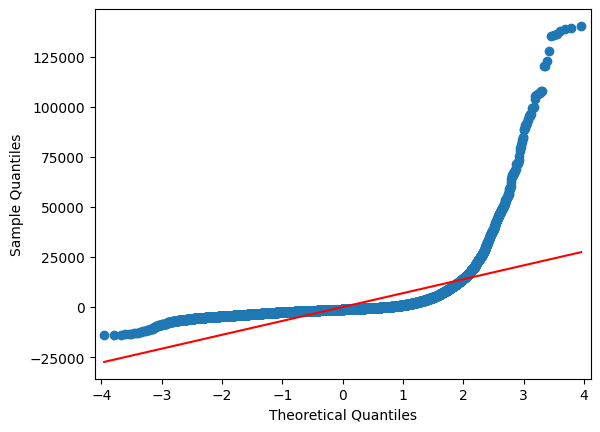

In [25]:
# Create a QQ plot for the residuals
sm.qqplot(final_model.resid, line='s');

#### Summary of Results & Analysis: Multilinear Regression with Statistically Significant Predictors (Part 1)

To build a more refined model that captures the significant predictors influencing the number of shares an article receives, a forward stepwise regression was performed. This technique involves iteratively adding predictors to the model, starting from an intercept-only model, and selecting the predictor that contributes the most to the increase in the adjusted R-squared value. The following predictors were identified as statistically significant and added to the model:

* LDA_03
* kw_max_avg
* global_subjectivity
* self_reference_min_shares
* num_hrefs
* LDA_02
* data_channel
* title_sentiment_polarity
* num_self_hrefs
* num_imgs
* n_tokens_title
* self_reference_max_shares
* average_token_length
* num_keywords
* kw_min_avg
* LDA_00
* abs_title_subjectivity
* kw_max_min
* kw_avg_max
* kw_min_max
* n_non_stop_unique_tokens
* LDA_01
* LDA_04

The resulting multilinear regression model with these predictors yielded an adjusted R-squared value of 0.036. This indicates that approximately 3.6% of the variability in the shares variable can be explained by the collective influence of these significant predictors.

However, it's noteworthy that the adjusted R-squared value has decreased compared to the multilinear model with all predictors (adjusted R-squared of 0.038). This suggests that the inclusion of some statistically insignificant predictors might have contributed slightly to the predictive power of the model.

**Evaluating Regression: Diagnostic Plot:**   
A QQ plot was generated to assess the normality of the residuals of the final model. Ideally, in a well-fitted linear regression model, the residuals should closely follow a straight diagonal line on the QQ plot, indicating normal distribution. In this case, the QQ plot displays results that are non-linear. This suggests that the assumption of normality for the residuals might not hold perfectly.

**Next steps:**  
Given the findings of this analysis, there are a few avenues that I could explore.

Model Refinement: Revisit the list of statistically insignificant predictors and perform feature selection by gradually removing those with higher p-values (this would be the 2nd time I do this). This could help streamline the model by eliminating predictors that do not significantly contribute to the outcome.

The following predictors are statistically significant (p-value < 0.05):
* kw_max_avg
* global_subjectivity
* self_reference_min_shares
* num_hrefs
* data_channel
* title_sentiment_polarity
* num_self_hrefs
* num_imgs
* n_tokens_title
* average_token_length
* num_keywords
* kw_min_avg

Interaction Terms: Investigate if interactions between predictors exist, meaning their combined effect on the outcome is different from what would be expected from the individual effects.

Nonlinear Models: If the relationship between the predictors and the outcome is inherently nonlinear, I could explore nonlinear regression techniques, such as polynomial regression. These models can capture more complex relationships by introducing polynomial terms of the predictors.

I'll investigate these techniques in this order and determine what to do next based on the results.

In [26]:
significant_predictors2 = ['kw_max_avg', 'global_subjectivity', 'self_reference_min_shares',
                          'num_hrefs', 'data_channel', 'title_sentiment_polarity', 'num_self_hrefs',
                          'num_imgs', 'n_tokens_title', 'average_token_length', 'num_keywords',
                          'kw_min_avg'
                         ]

In [27]:
# Create a DataFrame with only significant predictors
X_train_significant = X_train[significant_predictors2]
X_train_significant.insert(0, 'shares', y_train)  # Insert the target variable as the first column

# Initialize the list to keep track of selected predictors
selected_predictors = []

# Initialize the formula
formula = "shares ~ 1"  # Starting with intercept only

# Initialize variables to keep track of the best R-squared and predictor
best_r_squared = 0.0
best_predictor = None

# Perform forward stepwise regression
for _ in range(len(significant_predictors2)):
    remaining_predictors = list(set(significant_predictors2) - set(selected_predictors))
    r_squared_values = []
    
    for predictor in remaining_predictors:
        predictors = selected_predictors + [predictor]
        temp_formula = formula + " + " + " + ".join(predictors)
        
        temp_model = smf.ols(formula=temp_formula, data=X_train_significant).fit()
        r_squared = temp_model.rsquared_adj
        r_squared_values.append((predictor, r_squared))

    # Find the predictor with the highest increase in R-squared
    best_predictor, max_r_squared_increase = max(r_squared_values, key=lambda x: x[1])
    
    # Add the best predictor to the model
    selected_predictors.append(best_predictor)
    
    # Update the formula
    formula = formula + " + " + best_predictor

    # Update the best R-squared value
    best_r_squared = max_r_squared_increase
    
    # Print the current step's information
    print(f"Step {_+1}: Added predictor '{best_predictor}' (Adjusted R-squared: {best_r_squared:.4f})")

# Fit the final model
final_model2 = smf.ols(formula=formula, data=X_train_significant).fit()

print(final_model2.summary())
print(formula)

Step 1: Added predictor 'global_subjectivity' (Adjusted R-squared: 0.0097)
Step 2: Added predictor 'kw_max_avg' (Adjusted R-squared: 0.0166)
Step 3: Added predictor 'num_hrefs' (Adjusted R-squared: 0.0202)
Step 4: Added predictor 'self_reference_min_shares' (Adjusted R-squared: 0.0231)
Step 5: Added predictor 'data_channel' (Adjusted R-squared: 0.0244)
Step 6: Added predictor 'num_imgs' (Adjusted R-squared: 0.0254)
Step 7: Added predictor 'average_token_length' (Adjusted R-squared: 0.0261)
Step 8: Added predictor 'num_self_hrefs' (Adjusted R-squared: 0.0269)
Step 9: Added predictor 'title_sentiment_polarity' (Adjusted R-squared: 0.0276)
Step 10: Added predictor 'kw_min_avg' (Adjusted R-squared: 0.0282)
Step 11: Added predictor 'num_keywords' (Adjusted R-squared: 0.0286)
Step 12: Added predictor 'n_tokens_title' (Adjusted R-squared: 0.0289)
                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                   

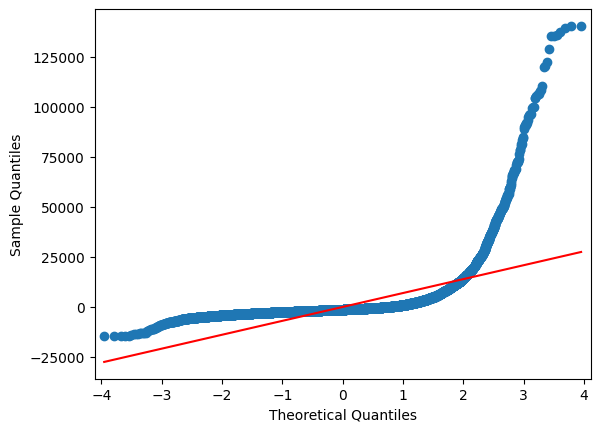

In [28]:
# Create a QQ plot for the residuals
sm.qqplot(final_model2.resid, line='s');

#### Summary of Results & Analysis: Multilinear Regression with Statistically Significant Predictors (Part 2)
In this second phase, I aimed to build a multilinear regression model that includes a reduced set of statistically significant predictors. I anticipated a further improvement in model performance. Surprisingly, the adjusted R-squared value decreased compared to the initial multilinear model, suggesting that the inclusion of certain predictors, even if they were statistically significant, did not collectively enhance the model's explanatory power.

**Evaluating Regression: Diagnostic Plot:**     
Despite the reduction in predictor variables, the diagnostic plot, specifically the QQ plot, still exhibits a non-linear pattern resembling a backward L shape. This continuing pattern raises the possibility of deviations from the assumption of normality in the residuals.

**Next steps:**  
The next phase of my analysis involves investigating if interactions between predictors exist, meaning their combined effect on the outcome is different from what would be expected from the individual effects.

#### Exploring Predictor Interactions with Random Forest
In this section, I employ a Random Forest algorithm to delve into potential interactions among predictors in the model. Random Forest, a powerful ensemble learning technique, inherently captures complex relationships between variables. By utilizing this approach, I aim to uncover intricate predictor interactions that may have a significant impact on predicting the number of shares an article receives. This method offers an efficient and comprehensive way to identify key features and interactions that contribute to the model's predictive performance.

Results from the Random Forest analysis shed light on the relative importance of each predictor and provide valuable insights into how these predictors jointly influence the target variable. This information empowers me to make informed decisions about feature selection and model refinement in our pursuit of creating an accurate predictive model for article sharing.

In [29]:
# Initialize and configure the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf_model.predict(X_test)

# Calculate the R-squared value of the model
rf_r2 = rf_model.score(X_test, y_test)

# Get feature importances from the model
feature_importances = rf_model.feature_importances_

# Pair feature names with feature importances
feature_importance_pairs = list(zip(predictors, feature_importances))

# Sort feature importances in descending order
feature_importance_pairs.sort(key=lambda x: x[1], reverse=True)

print("Feature Importances:")
for feature, importance in feature_importance_pairs:
    print(f"{feature}: {importance:.4f}")

print(f"Random Forest R-squared: {rf_r2:.4f}")

Feature Importances:
num_self_hrefs: 0.0331
num_hrefs: 0.0325
num_keywords: 0.0310
self_reference_min_shares: 0.0305
kw_max_avg: 0.0291
global_subjectivity: 0.0253
num_imgs: 0.0184
data_channel: 0.0164
average_token_length: 0.0137
n_tokens_title: 0.0121
title_sentiment_polarity: 0.0098
kw_min_avg: 0.0033
Random Forest R-squared: -0.0643


To further explore the potential interactions among predictors identified by the Random Forest analysis, I conducted a multilinear regression analysis. The goal was to assess how the inclusion of interaction terms could enhance the model's explanatory power.

In [30]:
selected_features = [feature for feature, importance in feature_importance_pairs[:12]]

In [31]:
# Create a new DataFrame with only the selected features for training
train_df_selected = train_df[selected_features + ['shares']]

In [60]:
# Create interaction terms
interaction_terms = []
for predictor1 in selected_features:
    for predictor2 in selected_features:
        if predictor1 != predictor2:
            interaction_name = f"{predictor1}_{predictor2}"
            train_df_selected[interaction_name] = train_df_selected[predictor1] * train_df_selected[predictor2]
            interaction_terms.append(interaction_name)

# Prepare data with interaction terms
data_with_interactions = pd.concat([train_df_selected, train_df_selected[interaction_terms]], axis=1).copy()

# Run multilinear regression with interaction terms
results = []
for interaction in interaction_terms:
    formula = f'shares ~ {" + ".join(selected_features + [interaction])}'
    ml_model = smf.ols(formula=formula, data=data_with_interactions).fit()
    results.append((interaction, ml_model.rsquared_adj))

results.sort(key=lambda x: x[1], reverse=True)
for interaction_name, adj_r2 in results:
    print(f"Interaction: {interaction_name}, Adjusted R-squared: {adj_r2:.4f}")

Interaction: self_reference_min_shares_global_subjectivity, Adjusted R-squared: 0.0308
Interaction: global_subjectivity_self_reference_min_shares, Adjusted R-squared: 0.0308
Interaction: self_reference_min_shares_num_imgs, Adjusted R-squared: 0.0306
Interaction: num_imgs_self_reference_min_shares, Adjusted R-squared: 0.0306
Interaction: kw_max_avg_num_imgs, Adjusted R-squared: 0.0301
Interaction: num_imgs_kw_max_avg, Adjusted R-squared: 0.0301
Interaction: global_subjectivity_data_channel, Adjusted R-squared: 0.0298
Interaction: data_channel_global_subjectivity, Adjusted R-squared: 0.0298
Interaction: num_keywords_kw_max_avg, Adjusted R-squared: 0.0297
Interaction: kw_max_avg_num_keywords, Adjusted R-squared: 0.0297
Interaction: num_imgs_average_token_length, Adjusted R-squared: 0.0297
Interaction: average_token_length_num_imgs, Adjusted R-squared: 0.0297
Interaction: num_self_hrefs_num_imgs, Adjusted R-squared: 0.0297
Interaction: num_imgs_num_self_hrefs, Adjusted R-squared: 0.0297
In

Interaction: self_reference_min_shares_global_subjectivity
                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     63.96
Date:                Fri, 11 Aug 2023   Prob (F-statistic):          1.46e-166
Time:                        11:34:45   Log-Likelihood:            -2.6440e+05
No. Observations:               25756   AIC:                         5.288e+05
Df Residuals:                   25742   BIC:                         5.289e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

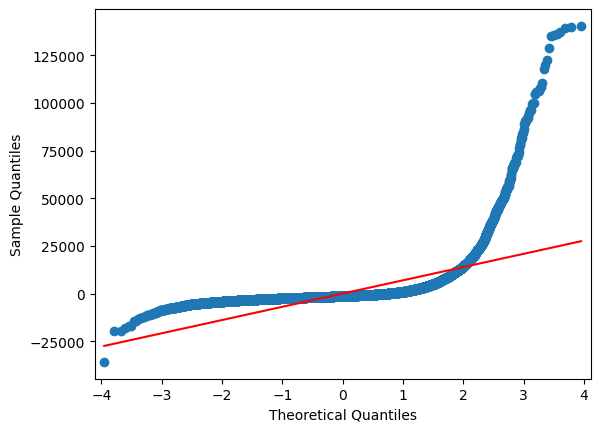

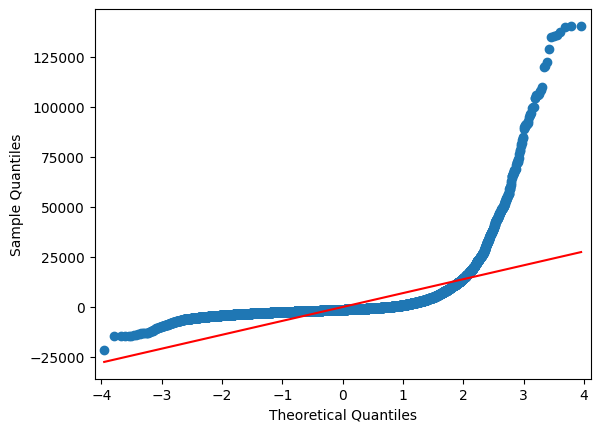

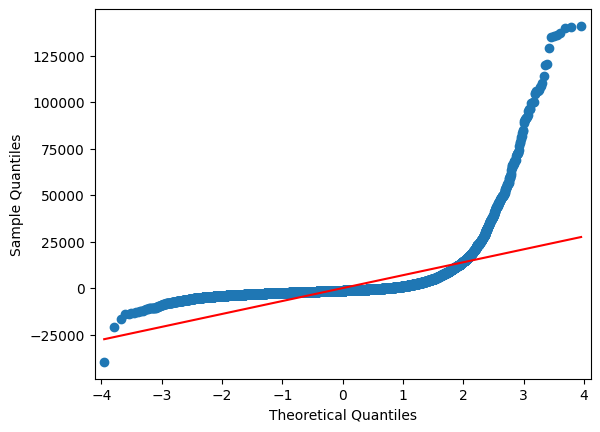

In [33]:
# Top 3 interaction terms
top_interactions = [
    "self_reference_min_shares_global_subjectivity",
    "kw_max_avg_num_imgs",
    "self_reference_min_shares_num_imgs"
]

# Prepare data with top interaction terms
data_with_top_interactions = pd.concat([train_df_selected, train_df_selected[top_interactions]], axis=1)

# Run multilinear regression with top interaction terms
for interaction in top_interactions:
    formula = f'shares ~ {" + ".join(selected_features + [interaction])}'
    ml_model = smf.ols(formula=formula, data=data_with_top_interactions).fit()
    print(f"Interaction: {interaction}")
    print(ml_model.summary())
    # Create a QQ plot for the residuals
    sm.qqplot(ml_model.resid, line='s')

#### Summary of Results & Analysis: Exploring Predictor Interactions with Random Forest
I incorporated interaction terms into the model based on the top-performing interactions from the Random Forest analysis. The selected interaction terms were:

* self_reference_min_shares_global_subjectivity
* kw_max_avg_num_imgs
* self_reference_min_shares_num_imgs

These interactions were chosen due to their relatively higher adjusted R-squared values and their potential to reveal intricate relationships between predictors.

The multilinear regression models with interaction terms exhibited limited improvement in explaining the variance in the target variable, "shares." The adjusted R-squared values for these models was 0.031. While statistically significant, these values indicate that only about 3.1% of the variation in the target variable could be explained by the included predictors and their interactions.

This modest increase in adjusted R-squared as compared to the multilinear model with statistically significant predictors suggests that while these interaction terms contribute to the model's predictive capacity, they do not strongly enhance its overall performance. It's important to note that the inclusion of interaction terms can introduce multicollinearity and increase model complexity, potentially leading to overfitting. Thus far, the model with the highest R-squared is the multilinear model with all predictors.

**Evaluating Regression: Diagnostic Plot:**     
Consistent with previous analyses, the QQ plots maintain a non-linear pattern resembling a backward L shape. This persistent pattern underscores potential deviations from the assumption of normality in the residuals.

#### Multicollinearity Detection: VIF
As part of the comprehensive analysis of my multilinear regression model, I further investigated the presence of multicollinearity among predictor variables. Multicollinearity can distort the interpretation of individual predictors' effects and affect the overall stability of the regression model.

VIF, or Variance Inflation Factor, is a widely used metric to assess multicollinearity. It quantifies how much the variance of the estimated regression coefficient is increased due to multicollinearity. A VIF value above a certain threshold (commonly 5 or 10) indicates high multicollinearity. Because the dataset includes over 40 predictors, I'll use a threshold of 5.

By identifying and addressing predictors with high VIF, I aimed to enhance the model's interpretability and minimize the risk of multicollinearity-induced instability.

In [34]:
# Get variables for which to compute VIF and add intercept term
# set all values in intercept term to 1
x_df_train['Intercept'] = 1
x_df_train.head()

,n_tokens_title,n_tokens_content,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,kw_min_min,...,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,data_channel,weekday_is,Intercept
35308,12.0,294.0,0.820359,7.0,5.0,2.0,1.0,4.625850,7.0,-1.0,...,-0.332143,-0.400000,-0.1250,0.00000,0.000000,0.50000,0.000000,2,3,1
2595,11.0,284.0,0.762500,1.0,0.0,1.0,1.0,4.690141,5.0,217.0,...,-0.194444,-0.300000,-0.1000,0.60000,0.200000,0.10000,0.200000,3,4,1
6100,10.0,254.0,0.745455,7.0,5.0,1.0,0.0,4.748031,6.0,4.0,...,-0.133333,-0.166667,-0.1000,0.00000,0.000000,0.50000,0.000000,3,2,1
11827,9.0,292.0,0.750000,6.0,5.0,0.0,17.0,4.602740,5.0,4.0,...,-0.475000,-0.700000,-0.2000,0.49513,0.211039,0.00487,0.211039,4,4,1
12758,11.0,306.0,0.741573,15.0,2.0,15.0,0.0,4.205882,10.0,4.0,...,-0.473438,-1.000000,-0.1875,0.00000,0.000000,0.50000,0.000000,7,3,1


In [35]:
# Compute and view VIF
vif = pd.DataFrame()
# using variance inflation factor from Statsmodel
vif['variables'] = x_df_train.columns
vif["VIF"] = [variance_inflation_factor(x_df_train.values, i) for i in range(x_df_train.shape[1])]
print(vif)

                       variables           VIF
0                 n_tokens_title  1.086528e+00
1               n_tokens_content  2.508867e+00
2       n_non_stop_unique_tokens  3.120861e+03
3                      num_hrefs  1.624994e+00
4                 num_self_hrefs  1.346270e+00
5                       num_imgs  1.620733e+00
6                     num_videos  1.238578e+00
7           average_token_length  1.258831e+00
8                   num_keywords  1.434711e+00
9                     kw_min_min  3.754937e+00
10                    kw_max_min  1.621238e+00
11                    kw_min_max  1.356872e+00
12                    kw_max_max  4.452995e+00
13                    kw_avg_max  2.917122e+00
14                    kw_min_avg  1.327269e+00
15                    kw_max_avg  1.794655e+00
16     self_reference_min_shares  5.388084e+00
17     self_reference_max_shares  8.086168e+00
18    self_reference_avg_sharess  1.660755e+01
19                        LDA_00  5.743000e+06
20           

Upon analysis, I identified the following predictors with VIF values exceeding the designated threshold of 5. These predictors were consequently excluded from the dataset:
* self_reference_min_shares
* self_reference_max_shares
* LDA_00
* LDA_02
* LDA_03
* LDA_04
* global_sentiment_polarity
* global_rate_negative_words
* avg_negative_polarity

In [36]:
# drop predictors with VIF greater than 5
columns_to_drop = ['self_reference_min_shares', 'self_reference_max_shares',
                'LDA_00', 'LDA_02', 'LDA_03', 'LDA_04', 'global_sentiment_polarity',
                'global_rate_negative_words', 'avg_negative_polarity']

x_df_train = x_df_train.drop(columns_to_drop, axis=1)
x_df_train.head()

,n_tokens_title,n_tokens_content,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,kw_min_min,...,max_positive_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,data_channel,weekday_is,Intercept
35308,12.0,294.0,0.820359,7.0,5.0,2.0,1.0,4.625850,7.0,-1.0,...,1.0,-0.400000,-0.1250,0.00000,0.000000,0.50000,0.000000,2,3,1
2595,11.0,284.0,0.762500,1.0,0.0,1.0,1.0,4.690141,5.0,217.0,...,0.8,-0.300000,-0.1000,0.60000,0.200000,0.10000,0.200000,3,4,1
6100,10.0,254.0,0.745455,7.0,5.0,1.0,0.0,4.748031,6.0,4.0,...,0.7,-0.166667,-0.1000,0.00000,0.000000,0.50000,0.000000,3,2,1
11827,9.0,292.0,0.750000,6.0,5.0,0.0,17.0,4.602740,5.0,4.0,...,1.0,-0.700000,-0.2000,0.49513,0.211039,0.00487,0.211039,4,4,1
12758,11.0,306.0,0.741573,15.0,2.0,15.0,0.0,4.205882,10.0,4.0,...,1.0,-1.000000,-0.1875,0.00000,0.000000,0.50000,0.000000,7,3,1


In [37]:
# Compute and view VIF to ensure all interactions are below 5
vif2 = pd.DataFrame()
# using variance inflation factor from Statsmodel
vif2['variables'] = x_df_train.columns
vif2["VIF"] = [variance_inflation_factor(x_df_train.values, i) for i in range(x_df_train.shape[1])]
print(vif2)

                       variables          VIF
0                 n_tokens_title     1.073025
1               n_tokens_content     1.999601
2       n_non_stop_unique_tokens     1.335710
3                      num_hrefs     1.574064
4                 num_self_hrefs     1.261591
5                       num_imgs     1.321363
6                     num_videos     1.126530
7           average_token_length     1.177110
8                   num_keywords     1.393974
9                     kw_min_min     3.745997
10                    kw_max_min     1.610859
11                    kw_min_max     1.341448
12                    kw_max_max     4.346782
13                    kw_avg_max     2.529692
14                    kw_min_avg     1.314823
15                    kw_max_avg     1.746513
16    self_reference_avg_sharess     1.037253
17                        LDA_01     1.174310
18           global_subjectivity     1.462172
19    global_rate_positive_words     1.867828
20           rate_positive_words  

The rate_positive_words and rate_negative_words have a threshold over 5 and will be dropped from the dataset.

In [38]:
# drop predictors with VIF greater than 5
columns_to_drop = ['rate_positive_words', 'rate_negative_words']

x_df_train = x_df_train.drop(columns_to_drop, axis=1)
x_df_train.head()

,n_tokens_title,n_tokens_content,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,kw_min_min,...,max_positive_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,data_channel,weekday_is,Intercept
35308,12.0,294.0,0.820359,7.0,5.0,2.0,1.0,4.625850,7.0,-1.0,...,1.0,-0.400000,-0.1250,0.00000,0.000000,0.50000,0.000000,2,3,1
2595,11.0,284.0,0.762500,1.0,0.0,1.0,1.0,4.690141,5.0,217.0,...,0.8,-0.300000,-0.1000,0.60000,0.200000,0.10000,0.200000,3,4,1
6100,10.0,254.0,0.745455,7.0,5.0,1.0,0.0,4.748031,6.0,4.0,...,0.7,-0.166667,-0.1000,0.00000,0.000000,0.50000,0.000000,3,2,1
11827,9.0,292.0,0.750000,6.0,5.0,0.0,17.0,4.602740,5.0,4.0,...,1.0,-0.700000,-0.2000,0.49513,0.211039,0.00487,0.211039,4,4,1
12758,11.0,306.0,0.741573,15.0,2.0,15.0,0.0,4.205882,10.0,4.0,...,1.0,-1.000000,-0.1875,0.00000,0.000000,0.50000,0.000000,7,3,1


In [39]:
# Compute and view VIF to ensure all interactions are below 5
vif3 = pd.DataFrame()
# using variance inflation factor from Statsmodel
vif3['variables'] = x_df_train.columns
vif3["VIF"] = [variance_inflation_factor(x_df_train.values, i) for i in range(x_df_train.shape[1])]
print(vif3)

                       variables         VIF
0                 n_tokens_title    1.072125
1               n_tokens_content    1.979820
2       n_non_stop_unique_tokens    1.003292
3                      num_hrefs    1.569576
4                 num_self_hrefs    1.260905
5                       num_imgs    1.320565
6                     num_videos    1.117591
7           average_token_length    1.176463
8                   num_keywords    1.393754
9                     kw_min_min    3.745862
10                    kw_max_min    1.610717
11                    kw_min_max    1.341134
12                    kw_max_max    4.346525
13                    kw_avg_max    2.529553
14                    kw_min_avg    1.313713
15                    kw_max_avg    1.746246
16    self_reference_avg_sharess    1.037203
17                        LDA_01    1.171346
18           global_subjectivity    1.455265
19    global_rate_positive_words    1.450374
20         avg_positive_polarity    2.546236
21        

Now that VIF for all intereactions is below 5. I can rerun the multilinear model.

In [40]:
predictors_wo_multicol = [
    'n_tokens_title', 'n_tokens_content', 'n_non_stop_unique_tokens',
    'num_hrefs', 'num_self_hrefs', 'num_imgs',
    'num_videos', 'average_token_length', 'num_keywords',
    'kw_min_min', 'kw_max_min', 'kw_min_max',
    'kw_max_max', 'kw_avg_max', 'kw_min_avg',
    'kw_max_avg', 'self_reference_avg_sharess', 'LDA_01',
    'global_subjectivity', 'global_rate_positive_words', 'avg_positive_polarity',
    'min_positive_polarity', 'max_positive_polarity', 'min_negative_polarity',
    'max_negative_polarity', 'title_subjectivity', 'title_sentiment_polarity',
    'abs_title_subjectivity', 'abs_title_sentiment_polarity', 'data_channel',
    'weekday_is'
]

In [41]:
no_multicol_model = smf.ols(formula='shares ~ {}'.format(list_to_string(predictors_wo_multicol)), data=train_df).fit()
no_multicol_model.summary()

n_tokens_title+n_tokens_content+n_non_stop_unique_tokens+num_hrefs+num_self_hrefs+num_imgs+num_videos+average_token_length+num_keywords+kw_min_min+kw_max_min+kw_min_max+kw_max_max+kw_avg_max+kw_min_avg+kw_max_avg+self_reference_avg_sharess+LDA_01+global_subjectivity+global_rate_positive_words+avg_positive_polarity+min_positive_polarity+max_positive_polarity+min_negative_polarity+max_negative_polarity+title_subjectivity+title_sentiment_polarity+abs_title_subjectivity+abs_title_sentiment_polarity+data_channel+weekday_is


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     28.55
Date:                Fri, 11 Aug 2023   Prob (F-statistic):          5.28e-163
Time:                        11:34:50   Log-Likelihood:            -2.6438e+05
No. Observations:               25756   AIC:                         5.288e+05
Df Residuals:                   25724   BIC:                         5.291e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                     1025.4081    982.844      1.043      0.297    -901.021    2951.837
n_tokens_title                  48.6666     21.340      2.281      0.023       6.839      90.494
n_tokens_content                -0.5247      0.131     -4.008      0.000      -0.781      -0.268
n_non_stop_unique_tokens         7.8771     10.716      0.735      0.462     -13.127      28.881
num_hrefs                       42.6315      4.775      8.928      0.000      33.272      51.991
num_self_hrefs                 -55.0199     12.467     -4.413      0.000     -79.456     -30.583
num_imgs                        36.5750      6.032      6.063      0.000      24.752      48.398
num_videos                      17.1559     11.117      1.543      0.123      -4.633      38.945
average_token_length          -837.9062    164.887     -5.082      0.000   -1161.095    -514.718
num_keywords                   149.7973     26.724      5.605      0.000      97.416     202.179
kw_min_min                       2.6478      1.197      2.212      0.027       0.301       4.994
kw_max_min                      -0.0361      0.015     -2.414      0.016      -0.065      -0.007
kw_min_max                      -0.0025      0.001     -2.863      0.004      -0.004      -0.001
kw_max_max                      -0.0005      0.000     -1.084      0.278      -0.001       0.000
kw_avg_max                       0.0031      0.001      5.855      0.000       0.002       0.004
kw_min_avg                       0.1548      0.044      3.511      0.000       0.068       0.241
kw_max_avg                       0.0832      0.010      8.295      0.000       0.064       0.103
self_reference_avg_sharess       0.0128      0.002      7.140      0.000       0.009       0.016
LDA_01                         -49.2722    213.758     -0.231      0.818    -468.249     369.705
global_subjectivity           4434.7686    594.895      7.455      0.000    3268.741    5600.796
global_rate_positive_words   -1926.7871   3236.531     -0.595      0.552   -8270.569    4416.995
avg_positive_polarity         -371.0593    807.856     -0.459      0.646   -1954.503    1212.385
min_positive_polarity          -65.2270    811.878     -0.080      0.936   -1656.554    1526.100
max_positive_polarity           75.6728    313.062      0.242      0.809    -537.946     689.291
min_negative_polarity         -460.6741    183.356     -2.512      0.012    -820.062    -101.286
max_negative_polarity         -875.9709    486.162     -1.802      0.072   -1828.875      76.933
title_subjectivity             213.7489    205.986      1.038      0.299    -189.996     617.494
title_sentiment_polarity       654.2681    185.005      3.536      0.000     291.647    1016.889
abs_title_subjectivity         861.5931    272.856      3.158      0.002    

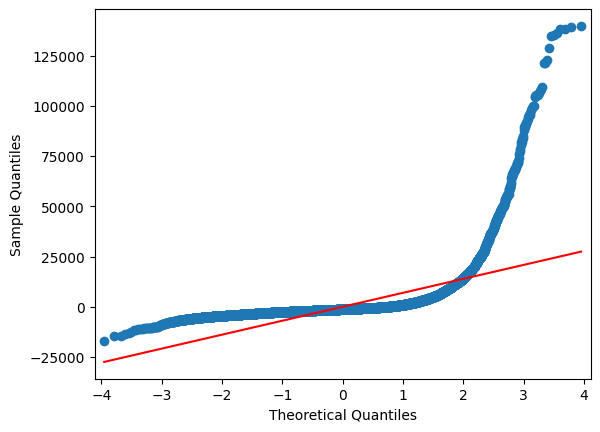

In [42]:
# Create a QQ plot for the residuals
sm.qqplot(no_multicol_model.resid, line='s');

#### Summary of Results & Analysis: Multicollinearity Detection
The removal of predictors exhibiting multicollinearity tendencies led to a marginal reduction in the model's R-squared value (0.033) compared to the R-squared value achieved by the multilinear model that incorporated all predictors (0.038). It's important to highlight that the QQ-plot of residuals still indicates a non-linear pattern, suggesting potential deviations from the assumption of normality in the residuals. I'll attempt to address this in the next section using polynomial regression.

### Polynomial Regression
In this section, I delve into the application of polynomial regression as a tool to address the observed nonlinearity in the residuals. The objective is to uncover potential curvilinear relationships between predictor variables and the response variable, shedding light on intricate dynamics influencing the number of shares an article receives.

The previous analysis indicated that a linear regression model might not fully capture the complexity of the relationships within the data. As a remedy, polynomial regression was explored. By incorporating polynomial terms, I aim to enhance the model's ability to capture nuanced patterns and better explain the variance in the response variable.

In [43]:
def polynomial_regression_summary(data, predictors, target, degree):
    # Construct the polynomial formula
    poly_formula = f'{target} ~ ' + ' + '.join([f'{col} + np.power({col}, {degree})' for col in predictors])
    
    # Fit the polynomial regression model
    poly_est = smf.ols(poly_formula, data).fit()
    
    # Return the fitted model
    return poly_est

#### Initial Polynomial Regression with All Predictors

In [44]:
degree = 2
polynomial_regression_summary(train_df, predictors, 'shares', degree).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     47.71
Date:                Fri, 11 Aug 2023   Prob (F-statistic):          1.94e-221
Time:                        11:34:51   Log-Likelihood:            -2.6425e+05
No. Observations:               25756   AIC:                         5.286e+05
Df Residuals:                   25731   BIC:                         5.288e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                               1.211e+04   6088.454      1.989      0.047     174.676     2.4e+04
global_subjectivity                    -1644.6432   3028.143     -0.543      0.587   -7579.973    4290.687
np.power(global_subjectivity, 2)        5962.2558   3230.700      1.845      0.065    -370.098    1.23e+04
kw_max_avg                                 0.1012      0.012      8.178      0.000       0.077       0.125
np.power(kw_max_avg, 2)                -3.975e-07   9.66e-08     -4.113      0.000   -5.87e-07   -2.08e-07
num_hrefs                                 33.2455      6.969      4.771      0.000      19.587      46.904
np.power(num_hrefs, 2)                     0.0254      0.069      0.370      0.711      -0.109       0.160
self_reference_min_shares                  0.0709      0.005     14.113      0.000       0.061       0.081
np.power(self_reference_min_shares, 2) -1.047e-07   8.79e-09    -11.911      0.000   -1.22e-07   -8.75e-08
data_channel                            -228.5836    138.153     -1.655      0.098    -499.370      42.203
np.power(data_channel, 2)                 41.3909     16.429      2.519      0.012       9.189      73.592
num_imgs                                  33.9166     10.537      3.219      0.001      13.264      54.569
np.power(num_imgs, 2)                     -0.3318      0.202     -1.645      0.100      -0.727       0.064
average_token_length                   -4079.4339   2504.552     -1.629      0.103   -8988.497     829.629
np.power(average_token_length, 2)        357.5119    261.833      1.365      0.172    -155.695     870.719
num_self_hrefs                           -25.6834     18.693     -1.374      0.169     -62.322      10.955
np.power(num_self_hrefs, 2)               -0.1466      0.472     -0.311      0.756      -1.071       0.778
title_sentiment_polarity                 403.7566    176.308      2.290      0.022      58.182     749.331
np.power(title_sentiment_polarity, 2)   1021.8826    274.691      3.720      0.000     483.472    1560.293
kw_min_avg                                -1.0617      0.124     -8.582      0.000      -1.304      -0.819
np.power(kw_min_avg, 2)                    0.0005   4.36e-05     10.421      0.000       0.000       0.001
num_keywords                             362.2013    162.149      2.234      0.026      44.380     680.022
np.power(num_keywords, 2)                -19.6971     11.197     -1.759      0.079     -41.645       2.251
n_tokens_title                          -247.0095    149.314     -1.654      0.098    -539.674      45.655
np.power(n_tokens_title, 2)               14.5613      7.004      2.079      0.038       0.833      28.290
==============================================================================
Omnibus:

In [45]:
degree = 3
polynomial_regression_summary(train_df, predictors, 'shares', degree).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     80.46
Date:                Fri, 11 Aug 2023   Prob (F-statistic):          1.51e-179
Time:                        11:34:51   Log-Likelihood:            -2.6438e+05
No. Observations:               25756   AIC:                         5.288e+05
Df Residuals:                   25744   BIC:                         5.289e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                  0.0269      0.009      3.056      0.002       0.010       0.044
global_subjectivity                        0.0251      0.004      6.099      0.000       0.017       0.033
np.power(global_subjectivity, 3)           0.0281      0.002     11.948      0.000       0.023       0.033
kw_max_avg                                 0.0931      0.009     10.372      0.000       0.076       0.111
np.power(kw_max_avg, 3)                 -9.02e-13   2.91e-13     -3.096      0.002   -1.47e-12   -3.31e-13
num_hrefs                                 40.9514      4.003     10.229      0.000      33.105      48.798
np.power(num_hrefs, 3)                    -0.0002      0.000     -1.020      0.308      -0.001       0.000
self_reference_min_shares                  0.0687      0.004     15.597      0.000       0.060       0.077
np.power(self_reference_min_shares, 3) -1.536e-13   1.17e-14    -13.119      0.000   -1.77e-13   -1.31e-13
data_channel                              -0.1572      0.041     -3.808      0.000      -0.238      -0.076
np.power(data_channel, 3)                  2.8797      0.385      7.475      0.000       2.125       3.635
num_imgs                                  13.5360      1.331     10.172      0.000      10.928      16.144
np.power(num_imgs, 3)                     -0.0008      0.001     -0.582      0.561      -0.004       0.002
average_token_length                       0.1698      0.044      3.835      0.000       0.083       0.257
np.power(average_token_length, 3)          5.2846      1.154      4.579      0.000       3.023       7.546
num_self_hrefs                             6.2244      0.604     10.299      0.000       5.040       7.409
np.power(num_self_hrefs, 3)               -0.0074      0.004     -1.890      0.059      -0.015       0.000
title_sentiment_polarity                   0.0509      0.005     10.622      0.000       0.041       0.060
np.power(title_sentiment_polarity, 3)      0.0319      0.003     10.261      0.000       0.026       0.038
kw_min_avg                                -0.4656      0.077     -6.057      0.000      -0.616      -0.315
np.power(kw_min_avg, 3)                 9.526e-08   8.75e-09     10.888      0.000    7.81e-08    1.12e-07
num_keywords                               0.2234      0.037      6.105      0.000       0.152       0.295
np.power(num_keywords, 3)                  0.8298      0.142      5.849      0.000       0.552       1.108
n_tokens_title                             0.1303      0.064      2.032      0.042       0.005       0.256
np.power(n_tokens_title, 3)                0.3621      0.054      6.725      0.000       0.257       0.468
==============================================================================
Omnibus:

In [46]:
degree = 4
polynomial_regression_summary(train_df, predictors, 'shares', degree).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                      -0.120
Model:                            OLS   Adj. R-squared:                 -0.120
Method:                 Least Squares   F-statistic:                    -917.0
Date:                Fri, 11 Aug 2023   Prob (F-statistic):               1.00
Time:                        11:34:51   Log-Likelihood:            -2.6627e+05
No. Observations:               25756   AIC:                         5.325e+05
Df Residuals:                   25752   BIC:                         5.326e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                               5.388e-16   2.12e-16      2.536      0.011    1.22e-16    9.55e-16
global_subjectivity                     9.976e-12   3.93e-12      2.536      0.011    2.27e-12    1.77e-11
np.power(global_subjectivity, 4)        2.619e-13   1.03e-13      2.536      0.011    5.95e-14    4.64e-13
kw_max_avg                              3.461e-12   1.36e-12      2.536      0.011    7.86e-13    6.14e-12
np.power(kw_max_avg, 4)                 2.383e-18   9.38e-19      2.542      0.011    5.45e-19    4.22e-18
num_hrefs                               1.249e-13   4.93e-14      2.536      0.011    2.84e-14    2.21e-13
np.power(num_hrefs, 4)                  2.133e-06   8.41e-07      2.536      0.011    4.85e-07    3.78e-06
self_reference_min_shares               9.073e-13   3.58e-13      2.536      0.011    2.06e-13    1.61e-12
np.power(self_reference_min_shares, 4)  1.312e-20   9.71e-21      1.351      0.177   -5.91e-21    3.22e-20
data_channel                            1.705e-15   6.72e-16      2.536      0.011    3.87e-16    3.02e-15
np.power(data_channel, 4)               2.603e-13   1.03e-13      2.536      0.011    5.91e-14    4.61e-13
num_imgs                                6.794e-15   2.68e-15      2.536      0.011    1.54e-15     1.2e-14
np.power(num_imgs, 4)                   8.904e-10   3.51e-10      2.536      0.011    2.02e-10    1.58e-09
average_token_length                    3.079e-15   1.21e-15      2.536      0.011    6.99e-16    5.46e-15
np.power(average_token_length, 4)        6.17e-13   2.43e-13      2.536      0.011     1.4e-13    1.09e-12
num_self_hrefs                          6.678e-15   2.63e-15      2.536      0.011    1.52e-15    1.18e-14
np.power(num_self_hrefs, 4)             1.253e-09   4.94e-10      2.536      0.011    2.85e-10    2.22e-09
title_sentiment_polarity                 2.79e-17    1.1e-17      2.536      0.011    6.34e-18    4.95e-17
np.power(title_sentiment_polarity, 4)   1.604e-17   6.33e-18      2.536      0.011    3.64e-18    2.84e-17
kw_min_avg                              5.989e-13   2.36e-13      2.536      0.011    1.36e-13    1.06e-12
np.power(kw_min_avg, 4)                 5.604e-11   1.28e-12     43.913      0.000    5.35e-11    5.85e-11
num_keywords                            4.588e-15   1.81e-15      2.536      0.011    1.04e-15    8.13e-15
np.power(num_keywords, 4)               2.913e-12   1.15e-12      2.536      0.011    6.62e-13    5.16e-12
n_tokens_title                          5.508e-15   2.17e-15      2.536      0.011    1.25e-15    9.76e-15
np.power(n_tokens_title, 4)             6.751e-12   2.66e-12      2.536      0.011    1.53e-12     1.2e-11
==============================================================================
Omnibus:

In [47]:
degree = 5
polynomial_regression_summary(train_df, predictors, 'shares', degree).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                      -0.131
Model:                            OLS   Adj. R-squared:                 -0.131
Method:                 Least Squares   F-statistic:                    -1494.
Date:                Fri, 11 Aug 2023   Prob (F-statistic):               1.00
Time:                        11:34:51   Log-Likelihood:            -2.6640e+05
No. Observations:               25756   AIC:                         5.328e+05
Df Residuals:                   25753   BIC:                         5.328e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                               5.663e-32   1.39e-33     40.697      0.000    5.39e-32    5.94e-32
global_subjectivity                    -1.002e-21   2.46e-23    -40.697      0.000   -1.05e-21   -9.54e-22
np.power(global_subjectivity, 5)         -1.8e-23   4.42e-25    -40.697      0.000   -1.89e-23   -1.71e-23
kw_max_avg                              4.256e-28   1.05e-29     40.697      0.000    4.05e-28    4.46e-28
np.power(kw_max_avg, 5)                 7.509e-24   3.17e-24      2.367      0.018    1.29e-24    1.37e-23
num_hrefs                               7.504e-31   1.84e-32     40.697      0.000    7.14e-31    7.87e-31
np.power(num_hrefs, 5)                  1.354e-23   3.33e-25     40.697      0.000    1.29e-23    1.42e-23
self_reference_min_shares               3.377e-28    8.3e-30     40.697      0.000    3.21e-28    3.54e-28
np.power(self_reference_min_shares, 5)  2.042e-26   1.47e-26      1.390      0.165   -8.37e-27    4.92e-26
data_channel                            2.597e-31   6.38e-33     40.697      0.000    2.47e-31    2.72e-31
np.power(data_channel, 5)               3.887e-28   9.55e-30     40.697      0.000     3.7e-28    4.07e-28
num_imgs                                3.651e-31   8.97e-33     40.697      0.000    3.48e-31    3.83e-31
np.power(num_imgs, 5)                   1.139e-24    2.8e-26     40.697      0.000    1.08e-24    1.19e-24
average_token_length                    2.653e-31   6.52e-33     40.697      0.000    2.52e-31    2.78e-31
np.power(average_token_length, 5)       1.335e-28   3.28e-30     40.697      0.000    1.27e-28     1.4e-28
num_self_hrefs                          1.862e-31   4.58e-33     40.697      0.000    1.77e-31    1.95e-31
np.power(num_self_hrefs, 5)             1.495e-25   3.67e-27     40.697      0.000    1.42e-25    1.57e-25
title_sentiment_polarity                5.238e-33   1.29e-34     40.697      0.000    4.99e-33    5.49e-33
np.power(title_sentiment_polarity, 5)   1.251e-33   3.07e-35     40.697      0.000    1.19e-33    1.31e-33
kw_min_avg                              1.676e-28   4.12e-30     40.697      0.000     1.6e-28    1.76e-28
np.power(kw_min_avg, 5)                 1.631e-14   4.01e-16     40.697      0.000    1.55e-14    1.71e-14
num_keywords                            3.577e-31   8.79e-33     40.697      0.000     3.4e-31    3.75e-31
np.power(num_keywords, 5)               1.269e-27   3.12e-29     40.697      0.000    1.21e-27    1.33e-27
n_tokens_title                          5.853e-31   1.44e-32     40.697      0.000    5.57e-31    6.14e-31
np.power(n_tokens_title, 5)             9.586e-27   2.36e-28     40.697      0.000    9.12e-27       1e-26
==============================================================================
Omnibus:

#### Summary of Results & Analysis: Initial Polynomial Regression
The initial polynomial regression was performed using all available predictor variables. Degrees ranging from 2 to 5 were evaluated to find the best-fitting model. The highest achieved R-squared value was 0.043, which corresponded to a polynomial degree of 2. This modest improvement over the best R-squared value obtained from multilinear regression (0.038) suggested that polynomial terms helped capture some of the nonlinear trends in the data.

#### Polynomial Regression without Multicollinearity

In [48]:
degree = 2
polynomial_regression_summary(train_df, predictors_wo_multicol, 'shares', degree).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     22.34
Date:                Fri, 11 Aug 2023   Prob (F-statistic):          8.77e-223
Time:                        11:34:51   Log-Likelihood:            -2.6419e+05
No. Observations:               25756   AIC:                         5.285e+05
Df Residuals:                   25698   BIC:                         5.290e+05
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                  1.174e+04   6016.776      1.952      0.051     -50.617    2.35e+04
n_tokens_title                             -230.4734    149.368     -1.543      0.123    -523.243      62.297
np.power(n_tokens_title, 2)                  13.8268      6.999      1.976      0.048       0.109      27.545
n_tokens_content                             -0.7626      0.266     -2.865      0.004      -1.284      -0.241
np.power(n_tokens_content, 2)                 0.0002   6.79e-05      3.001      0.003    7.07e-05       0.000
n_non_stop_unique_tokens                   1154.1138    633.546      1.822      0.069     -87.673    2395.901
np.power(n_non_stop_unique_tokens, 2)        -1.7624      0.974     -1.809      0.070      -3.672       0.147
num_hrefs                                    36.0616      7.482      4.820      0.000      21.396      50.727
np.power(num_hrefs, 2)                        0.0145      0.070      0.207      0.836      -0.123       0.152
num_self_hrefs                              -50.0096     18.904     -2.646      0.008     -87.062     -12.958
np.power(num_self_hrefs, 2)                   0.2250      0.474      0.475      0.635      -0.704       1.154
num_imgs                                     58.1546     11.812      4.923      0.000      35.002      81.307
np.power(num_imgs, 2)                        -0.6798      0.219     -3.106      0.002      -1.109      -0.251
num_videos                                   47.1148     19.798      2.380      0.017       8.310      85.919
np.power(num_videos, 2)                      -1.0594      0.500     -2.118      0.034      -2.040      -0.079
average_token_length                      -4602.9170   2521.982     -1.825      0.068   -9546.143     340.309
np.power(average_token_length, 2)           412.9765    263.701      1.566      0.117    -103.891     929.844
num_keywords                                194.1481    176.736      1.099      0.272    -152.264     540.561
np.power(num_keywords, 2)                    -7.2808     12.013     -0.606      0.544     -30.827      16.266
kw_min_min                                   13.9588     14.667      0.952      0.341     -14.790      42.708
np.power(kw_min_min, 2)                      -0.0530      0.066     -0.806      0.420      -0.182       0.076
kw_max_min                                   -0.1173      0.024     -4.856      0.000      -0.165      -0.070
np.power(kw_max_min, 2)                    1.525e-06   2.56e-07      5.963      0.000    1.02e-06    2.03e-06
kw_min_max                                   -0.0103      0.003     -3.631      0.000      -0.016      -0.005
np.power(kw_min_max, 2)                    7.503e-09   3.83e-09      1.961      0.050    1.93e-12     1.5e-08
kw_

In [49]:
degree = 3
polynomial_regression_summary(train_df, predictors_wo_multicol, 'shares', degree).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     43.33
Date:                Fri, 11 Aug 2023   Prob (F-statistic):          2.03e-143
Time:                        11:34:52   Log-Likelihood:            -2.6445e+05
No. Observations:               25756   AIC:                         5.289e+05
Df Residuals:                   25738   BIC:                         5.291e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                     0.0012      0.000      3.390      0.001       0.001       0.002
n_tokens_title                                0.0016      0.000      4.033      0.000       0.001       0.002
np.power(n_tokens_title, 3)                   0.2202      0.065      3.387      0.001       0.093       0.348
n_tokens_content                              0.0396      0.048      0.819      0.413      -0.055       0.134
np.power(n_tokens_content, 3)              8.425e-09    7.1e-09      1.187      0.235   -5.48e-09    2.23e-08
n_non_stop_unique_tokens                  -2.428e-06   6.84e-06     -0.355      0.723   -1.58e-05     1.1e-05
np.power(n_non_stop_unique_tokens, 3)      9.781e-06   2.54e-05      0.385      0.700      -4e-05    5.95e-05
num_hrefs                                     0.0005      0.001      0.716      0.474      -0.001       0.002
np.power(num_hrefs, 3)                        0.0007      0.000      3.320      0.001       0.000       0.001
num_self_hrefs                                0.0001      0.000      0.761      0.447      -0.000       0.000
np.power(num_self_hrefs, 3)                  -0.0011      0.004     -0.294      0.769      -0.009       0.006
num_imgs                                      0.0003      0.000      0.953      0.340      -0.000       0.001
np.power(num_imgs, 3)                         0.0014      0.002      0.876      0.381      -0.002       0.005
num_videos                                 9.834e-05   5.49e-05      1.792      0.073   -9.22e-06       0.000
np.power(num_videos, 3)                   -5.349e-05      0.004     -0.012      0.990      -0.009       0.009
average_token_length                       1.029e-05   3.42e-06      3.011      0.003    3.59e-06     1.7e-05
np.power(average_token_length, 3)            -0.0002      0.000     -1.596      0.110      -0.001    5.39e-05
num_keywords                                  0.0002      0.000      0.982      0.326      -0.000       0.001
np.power(num_keywords, 3)                     0.0398      0.045      0.885      0.376      -0.048       0.128
kw_min_min                                -2.313e-05   1.49e-05     -1.550      0.121   -5.24e-05    6.11e-06
np.power(kw_min_min, 3)                       0.0001    1.5e-05      8.806      0.000       0.000       0.000
kw_max_min                                   -0.1456      0.019     -7.493      0.000      -0.184      -0.107
np.power(kw_max_min, 3)                    1.702e-11   1.73e-12      9.839      0.000    1.36e-11    2.04e-11
kw_min_max                                   -0.0122      0.002     -5.875      0.000      -0.016      -0.008
np.power(kw_min_max, 3)                    8.852e-15   3.88e-15      2.283      0.022    1.25e-15    1.65e-14
kw_

In [50]:
degree = 4
polynomial_regression_summary(train_df, predictors_wo_multicol, 'shares', degree).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     18.33
Date:                Fri, 11 Aug 2023   Prob (F-statistic):           1.62e-24
Time:                        11:34:52   Log-Likelihood:            -2.6475e+05
No. Observations:               25756   AIC:                         5.295e+05
Df Residuals:                   25748   BIC:                         5.296e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                  1.901e-08   9.17e-10     20.719      0.000    1.72e-08    2.08e-08
n_tokens_title                             7.749e-09   3.74e-10     20.703      0.000    7.02e-09    8.48e-09
np.power(n_tokens_title, 4)               -1.473e-10   7.11e-12    -20.719      0.000   -1.61e-10   -1.33e-10
n_tokens_content                          -2.781e-11   1.34e-12    -20.697      0.000   -3.04e-11   -2.52e-11
np.power(n_tokens_content, 4)               1.62e-12   9.01e-13      1.798      0.072   -1.46e-13    3.39e-12
n_non_stop_unique_tokens                   7.966e-14   5.68e-15     14.017      0.000    6.85e-14    9.08e-14
np.power(n_non_stop_unique_tokens, 4)      9.834e-09   3.95e-08      0.249      0.803   -6.75e-08    8.72e-08
num_hrefs                                  6.227e-15   3.01e-16     20.710      0.000    5.64e-15    6.82e-15
np.power(num_hrefs, 4)                     4.828e-11   2.33e-12     20.716      0.000    4.37e-11    5.28e-11
num_self_hrefs                             2.237e-15   1.08e-16     20.715      0.000    2.03e-15    2.45e-15
np.power(num_self_hrefs, 4)                2.005e-11   9.69e-13     20.696      0.000    1.82e-11     2.2e-11
num_imgs                                   2.032e-15   9.83e-17     20.663      0.000    1.84e-15    2.22e-15
np.power(num_imgs, 4)                      1.058e-10   5.21e-12     20.323      0.000    9.56e-11    1.16e-10
num_videos                                 8.254e-16   3.99e-17     20.708      0.000    7.47e-16    9.04e-16
np.power(num_videos, 4)                    3.371e-11   1.63e-12     20.708      0.000    3.05e-11    3.69e-11
average_token_length                       3.198e-15   1.54e-16     20.708      0.000     2.9e-15     3.5e-15
np.power(average_token_length, 4)          3.296e-13   1.59e-14     20.708      0.000    2.98e-13    3.61e-13
num_keywords                               4.894e-15   2.36e-16     20.708      0.000    4.43e-15    5.36e-15
np.power(num_keywords, 4)                   2.49e-12    1.2e-13     20.708      0.000    2.25e-12    2.73e-12
kw_min_min                                 1.156e-13   5.58e-15     20.719      0.000    1.05e-13    1.27e-13
np.power(kw_min_min, 4)                    1.172e-06   5.66e-08     20.720      0.000    1.06e-06    1.28e-06
kw_max_min                                 8.761e-13   4.23e-14     20.706      0.000    7.93e-13    9.59e-13
np.power(kw_max_min, 4)                   -1.568e-17   1.06e-17     -1.479      0.139   -3.65e-17     5.1e-18
kw_min_max                                  5.54e-13   2.68e-14     20.698      0.000    5.02e-13    6.06e-13
np.power(kw_min_max, 4)                   -1.665e-20   2.87e-21     -5.791      0.000   -2.23e-20    -1.1e-20
kw_

In [51]:
degree = 5
polynomial_regression_summary(train_df, predictors_wo_multicol, 'shares', degree).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                      -0.015
Model:                            OLS   Adj. R-squared:                 -0.015
Method:                 Least Squares   F-statistic:                    -54.39
Date:                Fri, 11 Aug 2023   Prob (F-statistic):               1.00
Time:                        11:34:52   Log-Likelihood:            -2.6500e+05
No. Observations:               25756   AIC:                         5.300e+05
Df Residuals:                   25748   BIC:                         5.301e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                  9.542e-20   5.96e-21     16.015      0.000    8.37e-20    1.07e-19
n_tokens_title                            -4.058e-20   2.53e-21    -16.037      0.000   -4.55e-20   -3.56e-20
np.power(n_tokens_title, 5)                8.651e-22    5.4e-23     16.020      0.000    7.59e-22    9.71e-22
n_tokens_content                          -9.985e-21   6.22e-22    -16.058      0.000   -1.12e-20   -8.77e-21
np.power(n_tokens_content, 5)               2.19e-16   1.21e-16      1.809      0.070   -1.83e-17    4.56e-16
n_non_stop_unique_tokens                  -1.192e-24   7.43e-26    -16.048      0.000   -1.34e-24   -1.05e-24
np.power(n_non_stop_unique_tokens, 5)      1.299e-22   8.11e-24     16.013      0.000    1.14e-22    1.46e-22
num_hrefs                                 -1.614e-30   1.01e-31    -16.022      0.000   -1.81e-30   -1.42e-30
np.power(num_hrefs, 5)                      2.65e-24   1.65e-25     16.049      0.000    2.33e-24    2.97e-24
num_self_hrefs                             7.527e-33    4.9e-34     15.359      0.000    6.57e-33    8.49e-33
np.power(num_self_hrefs, 5)                5.225e-26   3.26e-27     16.027      0.000    4.59e-26    5.86e-26
num_imgs                                   7.788e-32   4.83e-33     16.134      0.000    6.84e-32    8.73e-32
np.power(num_imgs, 5)                      2.354e-25   5.42e-26      4.345      0.000    1.29e-25    3.42e-25
num_videos                                 6.361e-33   3.97e-34     16.031      0.000    5.58e-33    7.14e-33
np.power(num_videos, 5)                    3.787e-26   2.36e-27     16.068      0.000    3.32e-26    4.25e-26
average_token_length                       1.279e-32   7.99e-34     16.010      0.000    1.12e-32    1.44e-32
np.power(average_token_length, 5)          6.554e-30    4.1e-31     15.991      0.000    5.75e-30    7.36e-30
num_keywords                               5.043e-33   3.14e-34     16.039      0.000    4.43e-33    5.66e-33
np.power(num_keywords, 5)                  -1.13e-28   7.07e-30    -15.990      0.000   -1.27e-28   -9.92e-29
kw_min_min                                 2.997e-31   1.87e-32     16.018      0.000    2.63e-31    3.36e-31
np.power(kw_min_min, 5)                    6.621e-22   4.13e-23     16.018      0.000    5.81e-22    7.43e-22
kw_max_min                                 1.755e-29    1.1e-30     16.010      0.000    1.54e-29    1.97e-29
np.power(kw_max_min, 5)                   -7.914e-23   9.02e-23     -0.878      0.380   -2.56e-22    9.76e-23
kw_min_max                                 7.666e-28   4.79e-29     16.018      0.000    6.73e-28     8.6e-28
np.power(kw_min_max, 5)                   -2.031e-26   4.32e-27     -4.702      0.000   -2.88e-26   -1.18e-26
kw_

#### Summary of Results & Analysis: Polynomial Regression without Multicollinearity
Considering the potential impact of multicollinearity on the model's stability and interpretability, polynomial regression was further conducted using predictor variables devoid of significant multicollinearity. This refinement yielded a slightly improved R-squared value of 0.047, again at a polynomial degree of 2. This is the best model so far overall.

#### Polynomial Regression with Focus on Significant Predictors

In [52]:
degree = 2
polynomial_regression_summary(train_df, significant_predictors, 'shares', degree).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     29.78
Date:                Fri, 11 Aug 2023   Prob (F-statistic):          1.86e-244
Time:                        11:34:52   Log-Likelihood:            -2.6416e+05
No. Observations:               25756   AIC:                         5.284e+05
Df Residuals:                   25710   BIC:                         5.288e+05
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                               6545.8000   5115.684      1.280      0.201   -3481.228    1.66e+04
n_tokens_title                          -221.2505    149.073     -1.484      0.138    -513.442      70.941
np.power(n_tokens_title, 2)               14.0249      6.985      2.008      0.045       0.333      27.716
n_non_stop_unique_tokens                1070.4547    536.831      1.994      0.046      18.236    2122.674
np.power(n_non_stop_unique_tokens, 2)     -1.6324      0.825     -1.978      0.048      -3.250      -0.015
num_hrefs                                 34.8145      7.245      4.805      0.000      20.614      49.015
np.power(num_hrefs, 2)                     0.0123      0.069      0.178      0.859      -0.124       0.148
num_self_hrefs                           -53.3352     19.432     -2.745      0.006     -91.423     -15.247
np.power(num_self_hrefs, 2)                0.1804      0.476      0.379      0.705      -0.753       1.113
num_imgs                                  35.2475     11.502      3.065      0.002      12.703      57.792
np.power(num_imgs, 2)                     -0.3294      0.205     -1.607      0.108      -0.731       0.072
average_token_length                   -2788.4869   2525.280     -1.104      0.270   -7738.178    2161.205
np.power(average_token_length, 2)        242.1117    263.569      0.919      0.358    -274.497     758.721
num_keywords                             165.8175    176.325      0.940      0.347    -179.790     511.425
np.power(num_keywords, 2)                 -6.7251     11.999     -0.560      0.575     -30.245      16.794
kw_max_min                                -0.0988      0.024     -4.068      0.000      -0.146      -0.051
np.power(kw_max_min, 2)                 1.226e-06   2.58e-07      4.743      0.000    7.19e-07    1.73e-06
kw_min_max                                -0.0084      0.003     -2.942      0.003      -0.014      -0.003
np.power(kw_min_max, 2)                 5.286e-09   3.79e-09      1.395      0.163   -2.14e-09    1.27e-08
kw_avg_max                                -0.0025      0.001     -2.206      0.027      -0.005      -0.000
np.power(kw_avg_max, 2)                 5.192e-09   2.02e-09      2.568      0.010    1.23e-09    9.15e-09
kw_min_avg                                -0.9266      0.128     -7.240      0.000      -1.177      -0.676
np.power(kw_min_avg, 2)                    0.0004   4.74e-05      8.750      0.000       0.000       0.001
kw_max_avg                                 0.1580      0.021      7.563      0.000       0.117       0.199
np.power(kw_max_avg, 2)                 -1.34e-06    2.5e-07     -5.354      0.000   -1.83e-06    -8.5e-07
self_reference_min_shares                  0.0503      0.006      8.412      0.000     

In [53]:
degree = 3
polynomial_regression_summary(train_df, significant_predictors, 'shares', degree).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     54.19
Date:                Fri, 11 Aug 2023   Prob (F-statistic):          1.48e-181
Time:                        11:34:52   Log-Likelihood:            -2.6436e+05
No. Observations:               25756   AIC:                         5.288e+05
Df Residuals:                   25738   BIC:                         5.289e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                  0.0090      0.001     10.687      0.000       0.007       0.011
n_tokens_title                             0.0026      0.001      2.791      0.005       0.001       0.004
np.power(n_tokens_title, 3)                0.3324      0.054      6.112      0.000       0.226       0.439
n_non_stop_unique_tokens                   0.0004   5.63e-05      6.905      0.000       0.000       0.000
np.power(n_non_stop_unique_tokens, 3)   1.259e-05   2.53e-05      0.498      0.619    -3.7e-05    6.22e-05
num_hrefs                                  0.0399      0.004      9.713      0.000       0.032       0.048
np.power(num_hrefs, 3)                     0.0007      0.000      3.442      0.001       0.000       0.001
num_self_hrefs                            -0.0012      0.001     -1.857      0.063      -0.003     6.9e-05
np.power(num_self_hrefs, 3)               -0.0014      0.004     -0.354      0.723      -0.009       0.006
num_imgs                                   0.0203      0.002      8.976      0.000       0.016       0.025
np.power(num_imgs, 3)                      0.0023      0.001      1.627      0.104      -0.000       0.005
average_token_length                       0.0055      0.000     12.489      0.000       0.005       0.006
np.power(average_token_length, 3)          0.2660      0.028      9.537      0.000       0.211       0.321
num_keywords                               0.0108      0.001     10.778      0.000       0.009       0.013
np.power(num_keywords, 3)                  1.1904      0.135      8.824      0.000       0.926       1.455
kw_max_min                                -0.1131      0.019     -5.877      0.000      -0.151      -0.075
np.power(kw_max_min, 3)                 1.315e-11   1.74e-12      7.554      0.000    9.74e-12    1.66e-11
kw_min_max                                -0.0083      0.002     -3.993      0.000      -0.012      -0.004
np.power(kw_min_max, 3)                 6.412e-15   3.78e-15      1.699      0.089   -9.87e-16    1.38e-14
kw_avg_max                                 0.0022      0.001      3.874      0.000       0.001       0.003
np.power(kw_avg_max, 3)                 6.917e-16   1.97e-15      0.352      0.725   -3.16e-15    4.55e-15
kw_min_avg                                -0.4449      0.078     -5.668      0.000      -0.599      -0.291
np.power(kw_min_avg, 3)                 9.958e-08    9.3e-09     10.705      0.000    8.13e-08    1.18e-07
kw_max_avg                                 0.1761      0.015     12.104      0.000       0.148       0.205
np.power(kw_max_avg, 3)                -1.342e-11   1.73e-12     -7.755      0.000   -1.68e-11      -1e-11
self_reference_min_shares                  0.0499      0.005      9.900      0.000     

In [54]:
degree = 4
polynomial_regression_summary(train_df, significant_predictors, 'shares', degree).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                      -0.102
Model:                            OLS   Adj. R-squared:                 -0.102
Method:                 Least Squares   F-statistic:                    -339.7
Date:                Fri, 11 Aug 2023   Prob (F-statistic):               1.00
Time:                        11:34:53   Log-Likelihood:            -2.6606e+05
No. Observations:               25756   AIC:                         5.321e+05
Df Residuals:                   25748   BIC:                         5.322e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                               1.785e-09   7.18e-10      2.486      0.013    3.77e-10    3.19e-09
n_tokens_title                         -1.318e-09    5.3e-10     -2.485      0.013   -2.36e-09   -2.78e-10
np.power(n_tokens_title, 4)            -9.008e-10   3.62e-10     -2.485      0.013   -1.61e-09    -1.9e-10
n_non_stop_unique_tokens               -1.859e-10   7.49e-11     -2.483      0.013   -3.33e-10   -3.91e-11
np.power(n_non_stop_unique_tokens, 4)   2.219e-08   4.15e-08      0.534      0.593   -5.92e-08    1.04e-07
num_hrefs                               1.471e-12   5.92e-13      2.485      0.013    3.11e-13    2.63e-12
np.power(num_hrefs, 4)                  2.073e-06   8.34e-07      2.485      0.013    4.38e-07    3.71e-06
num_self_hrefs                         -4.922e-15   1.98e-15     -2.485      0.013   -8.81e-15   -1.04e-15
np.power(num_self_hrefs, 4)             1.174e-09   4.72e-10      2.485      0.013    2.48e-10     2.1e-09
num_imgs                               -5.302e-15   2.14e-15     -2.482      0.013   -9.49e-15   -1.12e-15
np.power(num_imgs, 4)                   1.229e-09   4.94e-10      2.487      0.013     2.6e-10     2.2e-09
average_token_length                   -1.259e-14   5.07e-15     -2.485      0.013   -2.25e-14   -2.66e-15
np.power(average_token_length, 4)      -1.047e-12   4.21e-13     -2.485      0.013   -1.87e-12   -2.21e-13
num_keywords                           -2.137e-14    8.6e-15     -2.485      0.013   -3.82e-14   -4.51e-15
np.power(num_keywords, 4)              -1.215e-11   4.89e-12     -2.485      0.013   -2.17e-11   -2.57e-12
kw_max_min                             -3.475e-12    1.4e-12     -2.485      0.013   -6.22e-12   -7.34e-13
np.power(kw_max_min, 4)                -2.001e-17   1.12e-17     -1.780      0.075    -4.2e-17    2.02e-18
kw_min_max                             -2.016e-11   8.11e-12     -2.485      0.013   -3.61e-11   -4.26e-12
np.power(kw_min_max, 4)                -5.178e-20   2.92e-21    -17.717      0.000   -5.75e-20    -4.6e-20
kw_avg_max                              -6.38e-10   2.57e-10     -2.485      0.013   -1.14e-09   -1.35e-10
np.power(kw_avg_max, 4)                 3.829e-20   2.02e-21     19.003      0.000    3.43e-20    4.22e-20
kw_min_avg                             -1.642e-12   6.61e-13     -2.485      0.013   -2.94e-12   -3.47e-13
np.power(kw_min_avg, 4)                 4.346e-11    1.5e-12     28.986      0.000    4.05e-11    4.64e-11
kw_max_avg                             -1.486e-11   5.98e-12     -2.485      0.013   -2.66e-11   -3.14e-12
np.power(kw_max_avg, 4)                 2.199e-17   1.12e-17      1.963      0.050    3.47e-20    4.39e-17
self_reference_min_shares              -1.019e-11    4.1e-12     -2.485      0.013   -1

In [55]:
degree = 5
polynomial_regression_summary(train_df, significant_predictors, 'shares', degree).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                      -0.120
Model:                            OLS   Adj. R-squared:                 -0.120
Method:                 Least Squares   F-statistic:                    -459.2
Date:                Fri, 11 Aug 2023   Prob (F-statistic):               1.00
Time:                        11:34:53   Log-Likelihood:            -2.6627e+05
No. Observations:               25756   AIC:                         5.326e+05
Df Residuals:                   25749   BIC:                         5.326e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                               9.602e-20   3.18e-21     30.188      0.000    8.98e-20    1.02e-19
n_tokens_title                         -1.973e-19   6.54e-21    -30.188      0.000    -2.1e-19   -1.84e-19
np.power(n_tokens_title, 5)             4.972e-20   1.65e-21     30.188      0.000    4.65e-20     5.3e-20
n_non_stop_unique_tokens               -6.949e-20    2.3e-21    -30.188      0.000    -7.4e-20    -6.5e-20
np.power(n_non_stop_unique_tokens, 5)   1.419e-21    4.7e-23     30.188      0.000    1.33e-21    1.51e-21
num_hrefs                               1.674e-23   5.55e-25     30.188      0.000    1.57e-23    1.78e-23
np.power(num_hrefs, 5)                  8.371e-23   2.77e-24     30.188      0.000    7.83e-23    8.92e-23
num_self_hrefs                          2.084e-43   1.14e-43      1.827      0.068   -1.52e-44    4.32e-43
np.power(num_self_hrefs, 5)             6.314e-25   2.09e-26     30.188      0.000     5.9e-25    6.72e-25
num_imgs                                1.983e-30   6.57e-32     30.188      0.000    1.85e-30    2.11e-30
np.power(num_imgs, 5)                   5.026e-24   1.67e-25     30.188      0.000     4.7e-24    5.35e-24
average_token_length                    2.038e-30   6.75e-32     30.188      0.000    1.91e-30    2.17e-30
np.power(average_token_length, 5)       1.024e-27   3.39e-29     30.188      0.000    9.57e-28    1.09e-27
num_keywords                            3.218e-30   1.07e-31     30.188      0.000    3.01e-30    3.43e-30
np.power(num_keywords, 5)               1.578e-26   5.23e-28     30.188      0.000    1.48e-26    1.68e-26
kw_max_min                              5.144e-28    1.7e-29     30.188      0.000    4.81e-28    5.48e-28
np.power(kw_max_min, 5)                -1.277e-22   9.53e-23     -1.340      0.180   -3.14e-22    5.91e-23
kw_min_max                               1.92e-27   6.36e-29     30.188      0.000     1.8e-27    2.04e-27
np.power(kw_min_max, 5)                -6.777e-26   4.43e-27    -15.288      0.000   -7.65e-26   -5.91e-26
kw_avg_max                              9.545e-26   3.16e-27     30.188      0.000    8.93e-26    1.02e-25
np.power(kw_avg_max, 5)                 4.957e-26    3.4e-27     14.574      0.000    4.29e-26    5.62e-26
kw_min_avg                              4.231e-28    1.4e-29     30.188      0.000    3.96e-28    4.51e-28
np.power(kw_min_avg, 5)                 1.381e-14   4.58e-16     30.188      0.000    1.29e-14    1.47e-14
kw_max_avg                              2.316e-27   7.67e-29     30.188      0.000    2.17e-27    2.47e-27
np.power(kw_max_avg, 5)                 1.346e-22   9.53e-23      1.413      0.158   -5.21e-23    3.21e-22
self_reference_min_shares               1.532e-27   5.08e-29     30.188      0.000    1

#### Run polynomial regression on 2nd iteration of statistically significant predictors

In [56]:
degree = 2
polynomial_regression_summary(train_df, significant_predictors2, 'shares', degree).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     47.71
Date:                Fri, 11 Aug 2023   Prob (F-statistic):          1.94e-221
Time:                        11:34:53   Log-Likelihood:            -2.6425e+05
No. Observations:               25756   AIC:                         5.286e+05
Df Residuals:                   25731   BIC:                         5.288e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                               1.211e+04   6088.454      1.989      0.047     174.676     2.4e+04
kw_max_avg                                 0.1012      0.012      8.178      0.000       0.077       0.125
np.power(kw_max_avg, 2)                -3.975e-07   9.66e-08     -4.113      0.000   -5.87e-07   -2.08e-07
global_subjectivity                    -1644.6435   3028.144     -0.543      0.587   -7579.976    4290.689
np.power(global_subjectivity, 2)        5962.2589   3230.706      1.845      0.065    -370.107    1.23e+04
self_reference_min_shares                  0.0709      0.005     14.113      0.000       0.061       0.081
np.power(self_reference_min_shares, 2) -1.047e-07   8.79e-09    -11.911      0.000   -1.22e-07   -8.75e-08
num_hrefs                                 33.2455      6.969      4.771      0.000      19.587      46.904
np.power(num_hrefs, 2)                     0.0254      0.069      0.370      0.711      -0.109       0.160
data_channel                            -228.5836    138.153     -1.655      0.098    -499.370      42.203
np.power(data_channel, 2)                 41.3909     16.429      2.519      0.012       9.189      73.592
title_sentiment_polarity                 403.7566    176.308      2.290      0.022      58.182     749.331
np.power(title_sentiment_polarity, 2)   1021.8826    274.691      3.720      0.000     483.472    1560.293
num_self_hrefs                           -25.6834     18.693     -1.374      0.169     -62.322      10.955
np.power(num_self_hrefs, 2)               -0.1466      0.472     -0.311      0.756      -1.071       0.778
num_imgs                                  33.9166     10.537      3.219      0.001      13.264      54.569
np.power(num_imgs, 2)                     -0.3318      0.202     -1.645      0.100      -0.727       0.064
n_tokens_title                          -247.0095    149.314     -1.654      0.098    -539.674      45.655
np.power(n_tokens_title, 2)               14.5613      7.004      2.079      0.038       0.833      28.290
average_token_length                   -4079.4339   2504.552     -1.629      0.103   -8988.497     829.629
np.power(average_token_length, 2)        357.5119    261.833      1.365      0.172    -155.695     870.719
num_keywords                             362.2013    162.149      2.234      0.026      44.380     680.022
np.power(num_keywords, 2)                -19.6971     11.197     -1.759      0.079     -41.645       2.251
kw_min_avg                                -1.0617      0.124     -8.582      0.000      -1.304      -0.819
np.power(kw_min_avg, 2)                    0.0005   4.36e-05     10.421      0.000       0.000       0.001
==============================================================================
Omnibus:

In [57]:
degree = 3
polynomial_regression_summary(train_df, significant_predictors2, 'shares', degree).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     80.46
Date:                Fri, 11 Aug 2023   Prob (F-statistic):          1.51e-179
Time:                        11:34:53   Log-Likelihood:            -2.6438e+05
No. Observations:               25756   AIC:                         5.288e+05
Df Residuals:                   25744   BIC:                         5.289e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                  0.0269      0.009      3.057      0.002       0.010       0.044
kw_max_avg                                 0.0931      0.009     10.372      0.000       0.076       0.111
np.power(kw_max_avg, 3)                 -9.02e-13   2.91e-13     -3.096      0.002   -1.47e-12   -3.31e-13
global_subjectivity                        0.0565      0.004     12.744      0.000       0.048       0.065
np.power(global_subjectivity, 3)           0.0279      0.002     11.909      0.000       0.023       0.033
self_reference_min_shares                  0.0687      0.004     15.598      0.000       0.060       0.077
np.power(self_reference_min_shares, 3) -1.535e-13   1.17e-14    -13.114      0.000   -1.76e-13   -1.31e-13
num_hrefs                                 40.9518      4.003     10.230      0.000      33.105      48.799
np.power(num_hrefs, 3)                    -0.0002      0.000     -1.020      0.308      -0.001       0.000
data_channel                              -0.1572      0.041     -3.808      0.000      -0.238      -0.076
np.power(data_channel, 3)                  2.8797      0.385      7.475      0.000       2.125       3.635
title_sentiment_polarity                   0.0509      0.005     10.622      0.000       0.041       0.060
np.power(title_sentiment_polarity, 3)      0.0319      0.003     10.262      0.000       0.026       0.038
num_self_hrefs                             6.2244      0.604     10.299      0.000       5.040       7.409
np.power(num_self_hrefs, 3)               -0.0074      0.004     -1.890      0.059      -0.015       0.000
num_imgs                                  13.5361      1.331     10.172      0.000      10.928      16.144
np.power(num_imgs, 3)                     -0.0008      0.001     -0.582      0.561      -0.004       0.002
n_tokens_title                             0.1303      0.064      2.032      0.042       0.005       0.256
np.power(n_tokens_title, 3)                0.3621      0.054      6.725      0.000       0.257       0.468
average_token_length                       0.1698      0.044      3.835      0.000       0.083       0.257
np.power(average_token_length, 3)          5.2843      1.154      4.579      0.000       3.022       7.546
num_keywords                               0.2234      0.037      6.105      0.000       0.152       0.295
np.power(num_keywords, 3)                  0.8298      0.142      5.849      0.000       0.552       1.108
kw_min_avg                                -0.4656      0.077     -6.057      0.000      -0.616      -0.315
np.power(kw_min_avg, 3)                 9.526e-08   8.75e-09     10.888      0.000    7.81e-08    1.12e-07
==============================================================================
Omnibus:

In [58]:
degree = 4
polynomial_regression_summary(train_df, significant_predictors2, 'shares', degree).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                      -0.120
Model:                            OLS   Adj. R-squared:                 -0.120
Method:                 Least Squares   F-statistic:                    -917.0
Date:                Fri, 11 Aug 2023   Prob (F-statistic):               1.00
Time:                        11:34:53   Log-Likelihood:            -2.6627e+05
No. Observations:               25756   AIC:                         5.325e+05
Df Residuals:                   25752   BIC:                         5.326e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                               5.388e-16   2.12e-16      2.536      0.011    1.22e-16    9.55e-16
kw_max_avg                              1.776e-11      7e-12      2.536      0.011    4.03e-12    3.15e-11
np.power(kw_max_avg, 4)                 2.383e-18   9.38e-19      2.542      0.011    5.45e-19    4.22e-18
global_subjectivity                      2.54e-16      1e-16      2.536      0.011    5.77e-17     4.5e-16
np.power(global_subjectivity, 4)        2.908e-17   1.15e-17      2.536      0.011     6.6e-18    5.15e-17
self_reference_min_shares               9.073e-13   3.58e-13      2.536      0.011    2.06e-13    1.61e-12
np.power(self_reference_min_shares, 4)  1.312e-20   9.71e-21      1.351      0.177   -5.91e-21    3.22e-20
num_hrefs                               1.249e-13   4.93e-14      2.536      0.011    2.84e-14    2.21e-13
np.power(num_hrefs, 4)                  2.133e-06   8.41e-07      2.536      0.011    4.85e-07    3.78e-06
data_channel                            1.705e-15   6.72e-16      2.536      0.011    3.87e-16    3.02e-15
np.power(data_channel, 4)               2.603e-13   1.03e-13      2.536      0.011    5.91e-14    4.61e-13
title_sentiment_polarity                 2.79e-17    1.1e-17      2.536      0.011    6.34e-18    4.95e-17
np.power(title_sentiment_polarity, 4)   1.604e-17   6.33e-18      2.536      0.011    3.64e-18    2.84e-17
num_self_hrefs                          6.678e-15   2.63e-15      2.536      0.011    1.52e-15    1.18e-14
np.power(num_self_hrefs, 4)             1.253e-09   4.94e-10      2.536      0.011    2.85e-10    2.22e-09
num_imgs                                6.794e-15   2.68e-15      2.536      0.011    1.54e-15     1.2e-14
np.power(num_imgs, 4)                   8.904e-10   3.51e-10      2.536      0.011    2.02e-10    1.58e-09
n_tokens_title                          5.508e-15   2.17e-15      2.536      0.011    1.25e-15    9.76e-15
np.power(n_tokens_title, 4)             6.751e-12   2.66e-12      2.536      0.011    1.53e-12     1.2e-11
average_token_length                    3.079e-15   1.21e-15      2.536      0.011    6.99e-16    5.46e-15
np.power(average_token_length, 4)        6.17e-13   2.43e-13      2.536      0.011     1.4e-13    1.09e-12
num_keywords                            4.588e-15   1.81e-15      2.536      0.011    1.04e-15    8.13e-15
np.power(num_keywords, 4)               2.913e-12   1.15e-12      2.536      0.011    6.62e-13    5.16e-12
kw_min_avg                              5.989e-13   2.36e-13      2.536      0.011    1.36e-13    1.06e-12
np.power(kw_min_avg, 4)                 5.604e-11   1.28e-12     43.913      0.000    5.35e-11    5.85e-11
==============================================================================
Omnibus:

In [59]:
degree = 5
polynomial_regression_summary(train_df, significant_predictors2, 'shares', degree).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                      -0.131
Model:                            OLS   Adj. R-squared:                 -0.131
Method:                 Least Squares   F-statistic:                    -1494.
Date:                Fri, 11 Aug 2023   Prob (F-statistic):               1.00
Time:                        11:34:53   Log-Likelihood:            -2.6640e+05
No. Observations:               25756   AIC:                         5.328e+05
Df Residuals:                   25753   BIC:                         5.328e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                               5.663e-32   1.39e-33     40.697      0.000    5.39e-32    5.94e-32
kw_max_avg                             -1.205e-22   2.96e-24    -40.697      0.000   -1.26e-22   -1.15e-22
np.power(kw_max_avg, 5)                 7.509e-24   3.17e-24      2.367      0.018    1.29e-24    1.37e-23
global_subjectivity                     1.446e-44   3.55e-46     40.758      0.000    1.38e-44    1.52e-44
np.power(global_subjectivity, 5)        2.229e-33   5.48e-35     40.697      0.000    2.12e-33    2.34e-33
self_reference_min_shares               3.377e-28    8.3e-30     40.697      0.000    3.21e-28    3.54e-28
np.power(self_reference_min_shares, 5)  2.042e-26   1.47e-26      1.390      0.165   -8.37e-27    4.92e-26
num_hrefs                               7.504e-31   1.84e-32     40.697      0.000    7.14e-31    7.87e-31
np.power(num_hrefs, 5)                  1.354e-23   3.33e-25     40.697      0.000    1.29e-23    1.42e-23
data_channel                            2.597e-31   6.38e-33     40.697      0.000    2.47e-31    2.72e-31
np.power(data_channel, 5)               3.887e-28   9.55e-30     40.697      0.000     3.7e-28    4.07e-28
title_sentiment_polarity                5.238e-33   1.29e-34     40.697      0.000    4.99e-33    5.49e-33
np.power(title_sentiment_polarity, 5)   1.251e-33   3.07e-35     40.697      0.000    1.19e-33    1.31e-33
num_self_hrefs                          1.862e-31   4.58e-33     40.697      0.000    1.77e-31    1.95e-31
np.power(num_self_hrefs, 5)             1.495e-25   3.67e-27     40.697      0.000    1.42e-25    1.57e-25
num_imgs                                3.651e-31   8.97e-33     40.697      0.000    3.48e-31    3.83e-31
np.power(num_imgs, 5)                   1.139e-24    2.8e-26     40.697      0.000    1.08e-24    1.19e-24
n_tokens_title                          5.853e-31   1.44e-32     40.697      0.000    5.57e-31    6.14e-31
np.power(n_tokens_title, 5)             9.586e-27   2.36e-28     40.697      0.000    9.12e-27       1e-26
average_token_length                    2.653e-31   6.52e-33     40.697      0.000    2.52e-31    2.78e-31
np.power(average_token_length, 5)       1.335e-28   3.28e-30     40.697      0.000    1.27e-28     1.4e-28
num_keywords                            3.577e-31   8.79e-33     40.697      0.000     3.4e-31    3.75e-31
np.power(num_keywords, 5)               1.269e-27   3.12e-29     40.697      0.000    1.21e-27    1.33e-27
kw_min_avg                              1.676e-28   4.12e-30     40.697      0.000     1.6e-28    1.76e-28
np.power(kw_min_avg, 5)                 1.631e-14   4.01e-16     40.697      0.000    1.55e-14    1.71e-14
==============================================================================
Omnibus:

#### Summary of Results & Analysis: Focus on Significant Predictors
Given the goal of identifying the most influential factors affecting article shares, polynomial regression was employed on the subset of significant predictor variables. Remarkably, this approach produced the highest R-squared value of the entire analysis: 0.050 at a polynomial degree of 2. This underscores the importance of focusing on key predictors to build a more concise and accurate model, although, this model is still not very accurate as the R-squared is closer to 0 than 1.

#### Summary of Results & Analysis: Polynomial Regression Overall
The application of polynomial regression provided valuable insights into the underlying relationships between predictor variables and the response variable. By flexibly accommodating nonlinear trends, this technique improved the model's predictive capability compared to the linear and multilinear regression approaches. The achieved R-squared values highlight the impact of careful predictor selection and the importance of accounting for nonlinearity in understanding the determinants of article shares. The highest R-squared achieved in this entire analysis was 0.05, which does mean that the model accuracy is not very good, as the model is significantly underfit.

## Discussion & Conclusion
In this study, my goal was to explore article sharing behavior in the digital landscape. I went into this project with the hope that I could construct a model that could be used to accurately predict the number of shares an article was likely to get. I explored every technique learned in class and some techniques that I taught myself. From the straightforward linear regression to the more sophisticated multilinear and polynomial regressions, I left no stone unturned in my quest for insights. Although I was not able to construct an accurate model, I did learn several new techniques that I hope to employ in future projects.

**Learning and Takeaways**  
In the process of conducting this analysis, several valuable insights have been gleaned. The application of various regression techniques, including linear, multilinear, and polynomial regression, shed light on the complex relationship between predictor variables and article shares.

One key takeaway is the importance of careful predictor selection. Through rigorous analysis, it became evident that certain predictors have a significant impact on article shares. This emphasizes the need for a thoughtful approach to feature engineering, which ultimately enhances model performance.

Furthermore, the implementation of polynomial regression proved to be a crucial step in capturing nonlinear trends. This technique provided the flexibility to model intricate relationships that would have been missed by simpler linear models. By accommodating these nonlinearities, the model was able to make more accurate predictions and achieve a better fit to the data, although, it was ultimately underfit.

**Opportunities for Improvement**  
One notable limitation is the relatively low R-squared values achieved across the different models. This suggests that there are factors influencing article shares that are not accounted for in the current predictor set. To address this, future analyses could explore additional predictors or consider more advanced techniques that capture more complex interactions. Furthermore, more complex models like neural net or deep learning methods could be useful to understand the structure of the data better.

**GitHub Repo**  
https://github.com/MYWeidner/OnlineNewsPopularity

**References:**  
https://www.javatpoint.com/linear-regression-vs-logistic-regression-in-machine-learning#:~:text=Linear%20regression%20is%20used%20to,used%20for%20solving%20Regression%20problem

https://www.analyticsvidhya.com/blog/2020/12/beginners-take-how-logistic-regression-is-related-to-linear-regression/

https://www.datacamp.com/tutorial/tutorial-lasso-ridge-regression

https://www.tutorialspoint.com/ridge-and-lasso-regression-explained

https://www.analyticsvidhya.com/blog/2016/01/ridge-lasso-regression-python-complete-tutorial/#:~:text=The%20ridge%20coefficients%20are%20a,in%20comparison%20to%20the%20ridge.

https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

https://williamkoehrsen.medium.com/random-forest-simple-explanation-377895a60d2d

https://www.statisticshowto.com/variance-inflation-factor/

https://statisticsbyjim.com/regression/variance-inflation-factors/

https://enjoymachinelearning.com/blog/multivariate-polynomial-regression-python/?expand_article=1